## Balance Data

In [298]:
!pip install lazypredict

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score, roc_curve, precision_recall_curve, matthews_corrcoef, auc
from sklearn.calibration import CalibratedClassifierCV

In [300]:
# function to create classification reports
import seaborn as sns

def Generate_Model_Test_Classification_Report(model, X_test, y_test, model_name=""):

        '''
        Purpose:
            Generate the consolidated test classification report.
            A one-stop function to generate all the relevant model evaluation metrics.
            The report consists of the following classification results & metrics -
                1. Confusion Matrix
                2. Classification Report
                3. F1 Score
                4. Accuracy
                5. Mathews Correlation Coefficient (MCC)
                6. Precision
                7. Recall
                8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
                9. AUC-PR Score - Area Under the Precision Recall Curve.
                10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
                11. AUC-PR Curve - Area Under the Precision Recall Curve.

        Parameters:
            1. y_test - The Ground Truth for each test image.
            2. y_pred - The Predicted label for each image.
            3. model_name - Model Name

        Return Value:
            NONE.
        '''

        y = 1.05
        # Report Title & Classification Mterics Abbreviations...
        fig, axes = plt.subplots(3, 1, figsize = (8, 3))
        axes[0].text(9, 1.8, "CONSOLIDATED MODEL TEST REPORT", fontsize=30, horizontalalignment='center',
                     color='DarkBlue', weight = 'bold')

        axes[0].axis([0, 10, 0, 10])
        axes[0].axis('off')

        axes[1].text(9, 4, "Model Name: " + model_name, style='italic',
                             fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')

        axes[2].text(0, 4, "* 1 - Had Heart Attack\t\t\t\t\t\t\t * 0 - Did not have Heart Attack\n".expandtabs() +
                     "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                     "* ROC - Receiver Operating Characteristics     " +
                     "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(),
                     style='italic', fontsize=10, horizontalalignment='left', color='orangered')

        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')

        scores = []
        metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
                   'AUC_ROC  ', 'AUC_PR   ']

        # Plot ROC and PR curves using all models and test data...
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1:]

        fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
        precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

        # Calculate the individual classification metic scores...
        model_f1_score = f1_score(y_test, y_pred)
        model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
        model_precision_score = precision_score(y_test, y_pred)
        model_recall_score = recall_score(y_test, y_pred)
        model_accuracy_score = accuracy_score(y_test, y_pred)
        model_auc_roc = auc(fpr, tpr)
        model_auc_pr = auc(recall, precision)

        scores.append([model_f1_score,
                       model_matthews_corrcoef_score,
                       model_precision_score,
                       model_recall_score,
                       model_accuracy_score,
                       model_auc_roc,
                       model_auc_pr])

        sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
        for i in range(len(scores[0])):
            sampling_results.loc[i] = [metrics[i], scores[0][i]]

        sampling_results.index = np.arange(1, len(sampling_results) + 1)

        class_report = classification_report(y_test, y_pred)
        conf_matx = confusion_matrix(y_test, y_pred)

        # Display the Confusion Matrix...
        fig, axes = plt.subplots(1, 3, figsize = (20, 4))
        sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
        axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold',
                          style='italic', loc='left', y=y)

        # Classification Metrics
        axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic',
                     fontsize=20, horizontalalignment='center')
        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')
        axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold',
                          style='italic', loc='center', y=y)

        # Classification Report
        axes[2].text(0, 1, class_report, style='italic', fontsize=20)
        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')
        axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold',
                          style='italic', loc='center', y=y)

        plt.tight_layout()
        plt.show()

        # AUC-ROC & Precision-Recall Curve
        fig, axes = plt.subplots(1, 2, figsize = (14, 4))

        axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
        axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].legend(loc = "lower right")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold',
                          style='italic', loc='center', pad=1, y=y)

        axes[1].legend(loc = "lower left")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold',
                          style='italic', loc='center', pad=3, y=y)

        plt.subplots_adjust(top=0.95)
        plt.tight_layout()
        plt.show()

        return scores

In [301]:
data= pd.read_csv('heart_data_cleaned.csv')

In [302]:
data.shape

(246022, 40)

In [303]:
data.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      1    2              2                 4.0               0.0   
1      1    1              2                 0.0               0.0   
2      1    1              2                 0.0               0.0   
3      1    2              4                 5.0               0.0   
4      1    2              3                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                1                   1         9.0             4   
1                1                   1         6.0             4   
2                1                   2         8.0             2   
3                1                   1         9.0             4   
4                1                   1         5.0             1   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0               2  ...            1.60              71.67  27.99   
1               2  ...            1.78              95.25  30.13   
2               2  ...            1.85             108.86  31.66   
3               2  ...            1.70              90.72  31.32   
4               2  ...            1.55              79.38  33.07   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                2           2             1              1   
1                2           2             1              1   
2                1           2             2              1   
3                2           2             1              1   
4                2           2             1              1   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                  1                 2         2  
1                  3                 2         2  
2                  4                 2         1  
3                  4                 2         1  
4                  4                 2         2  

[5 rows x 40 columns]

In [304]:
data['HadHeartAttack'].replace(to_replace={1:0, 2:1}, inplace=True)

In [305]:
data.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      1    2              2                 4.0               0.0   
1      1    1              2                 0.0               0.0   
2      1    1              2                 0.0               0.0   
3      1    2              4                 5.0               0.0   
4      1    2              3                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                1                   1         9.0             4   
1                1                   1         6.0             4   
2                1                   2         8.0             2   
3                1                   1         9.0             4   
4                1                   1         5.0             1   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0               1  ...            1.60              71.67  27.99   
1               1  ...            1.78              95.25  30.13   
2               1  ...            1.85             108.86  31.66   
3               1  ...            1.70              90.72  31.32   
4               1  ...            1.55              79.38  33.07   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                2           2             1              1   
1                2           2             1              1   
2                1           2             2              1   
3                2           2             1              1   
4                2           2             1              1   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                  1                 2         2  
1                  3                 2         2  
2                  4                 2         1  
3                  4                 2         1  
4                  4                 2         2  

[5 rows x 40 columns]

In [306]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [307]:
data.shape

(246022, 40)

In [308]:
data['HadHeartAttack'].value_counts()

1    232587
0     13435
Name: HadHeartAttack, dtype: int64

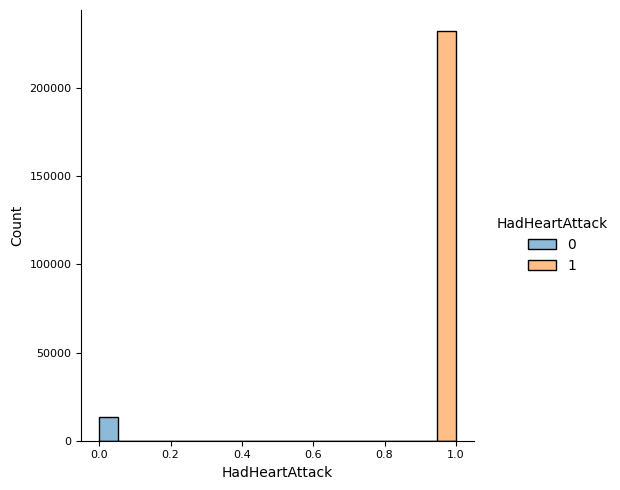

In [309]:
sn.displot(data, x="HadHeartAttack", hue='HadHeartAttack')

In [310]:
no_ha = data.loc[data['HadHeartAttack'] == 0]
ha = data.loc[data['HadHeartAttack'] == 1].sample(n = 13435, random_state=33)
frames = [ha,no_ha]
data = pd.concat(frames)

In [311]:
data.shape

(26870, 40)

In [312]:
data['HadHeartAttack'].value_counts()

1    13435
0    13435
Name: HadHeartAttack, dtype: int64

In [313]:
data

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
136294     31    1              2                 0.0               0.0   
14104       5    2              1                 0.0               0.0   
69633      17    1              2                 1.0               1.0   
107477     24    1              2                 0.0               0.0   
150884     33    2              2                 0.0               0.0   
...       ...  ...            ...                 ...               ...   
245922     54    2              4                 0.0               0.0   
245943     54    1              4                 0.0               0.0   
246012     54    1              4                 7.0              30.0   
246016     54    1              3                 0.0               0.0   
246021     54    1              2                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
136294                1                   1         7.0             4   
14104                 1                   1         8.0             4   
69633                 1                   1         7.0             1   
107477                4                   1         6.0             4   
150884                1                   1         9.0             4   
...                 ...                 ...         ...           ...   
245922                1                   2         6.0             2   
245943                2                   1         8.0             4   
246012                1                   2         4.0             4   
246016                1                   2         6.0             1   
246021                1                   2         5.0             4   

        HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
136294               1  ...            1.73              83.91  28.13   
14104                1  ...            1.52              40.82  17.58   
69633                1  ...            1.83              92.99  27.80   
107477               1  ...            1.78              92.99  29.41   
150884               1  ...            1.55              97.52  40.62   
...                ...  ...             ...                ...    ...   
245922               0  ...            1.55              63.50  26.45   
245943               0  ...            1.88             117.93  33.38   
246012               0  ...            1.88             117.93  33.38   
246016               0  ...            1.80             118.84  36.54   
246021               0  ...            1.83             108.86  32.55   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
136294                1           2             1              1   
14104                 2           2             2              2   
69633                 1           1             2              2   
107477                2           1             2              2   
150884                2           2             1              2   
...                 ...         ...           ...            ...   
245922                1           2             2              1   
245943                2           1             2              2   
246012                1           1             2              2   
246016                1           1             1              2   
246021                2           1             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
136294                  4                 2         2  
14104                   1                 2         1  
69633                   3                 2         2  
107477                  4                 2         2  
150884                  4                 2         2  
...                   ...               ...       ...  
245922                  1                 2         2  
245943                  3                 2         2  
246012                  4       

In [314]:
N=13435*2
data=data.sample(n = N, random_state=33)

In [315]:
data['HadHeartAttack'].value_counts()

0    13435
1    13435
Name: HadHeartAttack, dtype: int64

In [316]:
data[0:10]

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
125217     27    2              2                 0.0               0.0   
234943     50    1              2                 2.0               0.0   
226715     48    1              2                 0.0               0.0   
192327     44    2              2                 0.0               5.0   
241539     52    2              4                 0.0               5.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
125217                2                   1         7.0             4   
234943                1                   1         7.0             4   
226715                3                   2         7.0             4   
192327                4                   1         7.0             2   
241539                1                   1         5.0             1   

        HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
52276                0  ...            1.78             117.93  37.31   
8733                 0  ...            1.68              85.73  30.51   
181315               0  ...            1.68              79.38  28.25   
74042                0  ...            1.68              65.77  23.40   
143498               0  ...            1.80              83.46  25.66   
125217               1  ...            1.65              70.31  25.79   
234943               0  ...            1.80              72.57  22.32   
226715               1  ...            1.75             151.95  49.47   
192327               1  ...            1.75              92.53  30.13   
241539               1  ...            1.70              94.80  32.73   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
125217                2           2             1              2   
234943                1           1             1              1   
226715                1           2             2              2   
192327                2           1             2              2   
241539                1           1             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
125217                  4                 2         2  
234943                  1                 2         2  
226715                  4                 2         1  
192327                  4                 2         2  
241539                  4                 1         2  

[10 rows x 40 columns]

## Heatmap

<ipython-input-317-b2da2452e6c7>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


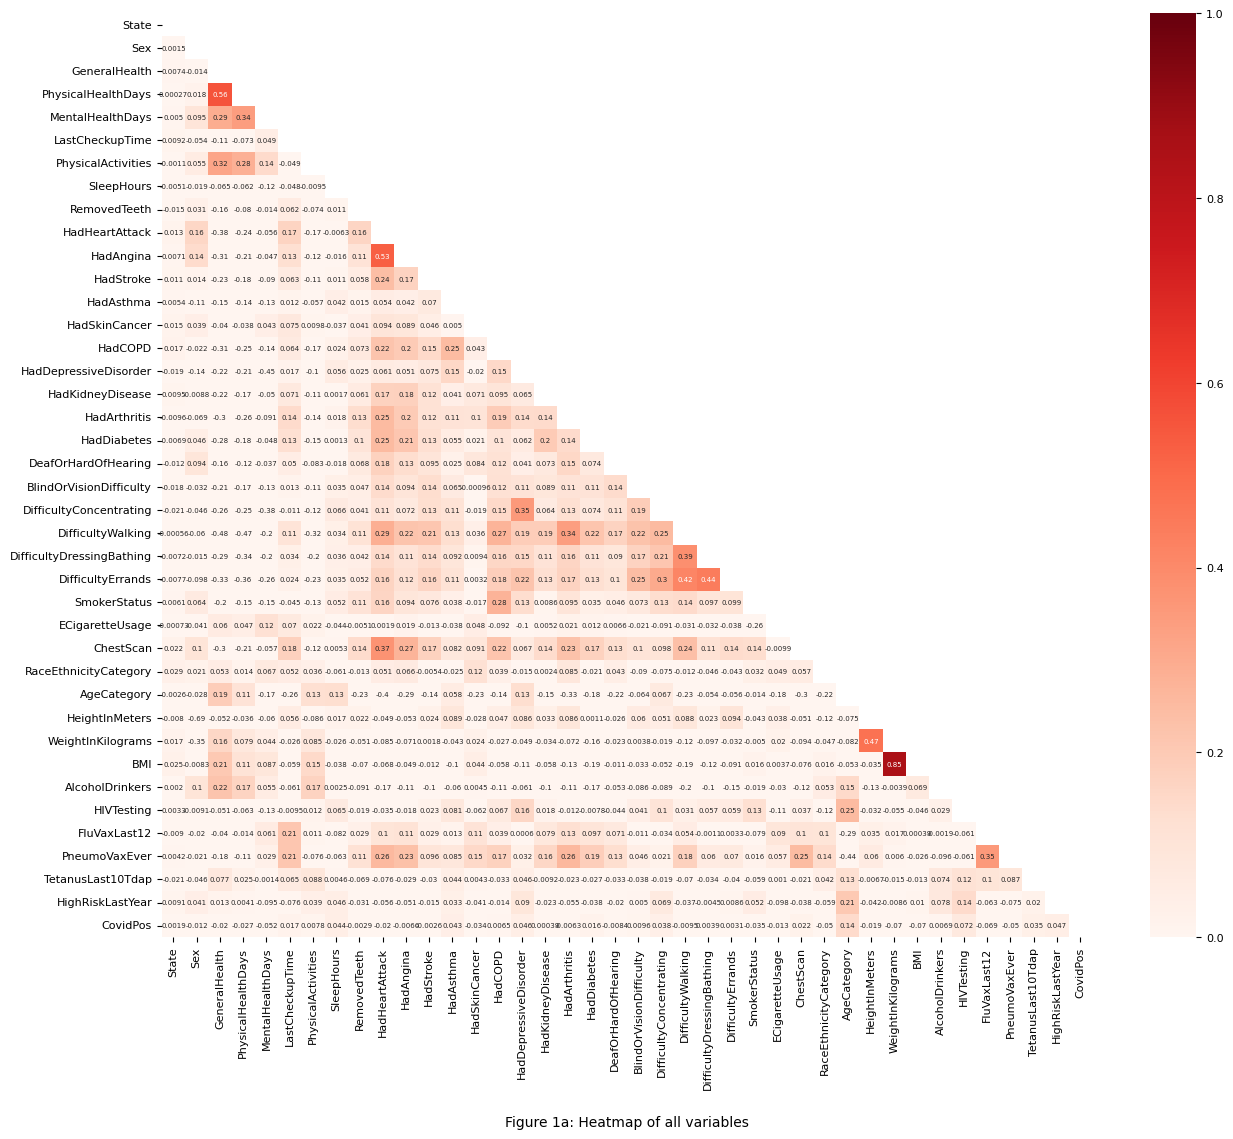

In [317]:
plt.rc('xtick', labelsize=8)   # fontsize of the tick labels
plt.rc('ytick', labelsize=8)  # fontsize of the tick labels
plt.figure(figsize=(15, 12))

plt.annotate('Figure 1a: Heatmap of all variables',
            xy = (0.5, -0.2),
            xycoords='axes fraction',
            ha='center',
            va="center",
            fontsize=10)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sn.heatmap(data.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Reds', annot_kws={"size": 5})

In [318]:
data['HadHeartAttack'].value_counts()

0    13435
1    13435
Name: HadHeartAttack, dtype: int64

## Split Data into Test, Train, Validate

In [319]:
Data= data
Predictors= Data.loc[:, Data.columns!='HadHeartAttack']
Labels= Data.iloc[:,9]
x_train, x_test, y_train, y_test= train_test_split(Predictors, Labels, test_size=0.85)

In [320]:
data.shape

(26870, 40)

In [321]:
print(26870*.7)
print(26870*.2)
print(26870*.1)

18809.0
5374.0
2687.0


In [322]:
x_train=data[0:18809]
y_train= x_train.iloc[:,9]
x_train=x_train.loc[:, Data.columns!='HadHeartAttack']

x_test=data[18809:24183]
y_test= x_test.iloc[:,9]
x_test=x_test.loc[:, Data.columns!='HadHeartAttack']

x_val=data[24183:26870]
y_val= x_val.iloc[:,9]
x_val=x_val.loc[:, Data.columns!='HadHeartAttack']

In [323]:
x_train

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
100521     23    2              5                20.0               0.0   
113529     24    1              3                 8.0               0.0   
174517     39    2              3                 0.0               0.0   
168433     37    2              3                20.0               2.0   
58357      15    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
...                 ...                 ...         ...           ...   
100521                1                   2         6.0             4   
113529                1                   1         6.0             3   
174517                1                   1         7.0             4   
168433                1                   1         8.0             4   
58357                 1                   2         8.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
52276           1  ...            1.78             117.93  37.31   
8733            1  ...            1.68              85.73  30.51   
181315          2  ...            1.68              79.38  28.25   
74042           1  ...            1.68              65.77  23.40   
143498          1  ...            1.80              83.46  25.66   
...           ...  ...             ...                ...    ...   
100521          2  ...            1.52              58.97  25.39   
113529          1  ...            1.65              71.67  26.29   
174517          2  ...            1.60              75.30  29.41   
168433          2  ...            1.60              56.70  22.14   
58357           2  ...            1.63              81.65  30.90   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
...                 ...         ...           ...            ...   
100521                2           2             1              1   
113529                2           2             1              1   
174517                2           2             2              2   
168433                2           1             2              2   
58357                 2           1             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
...                   ...               ...       ...  
100521                  3                 2         2  
113529                  3                 2         3  
174517                  2                 2         1  
168433                  1           

## ANOVA F-Test

In [324]:
Predictors

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
112226     24    2              1                 0.0               0.0   
27935       7    2              3                 7.0              25.0   
106758     24    2              3                 0.0               0.0   
53219      13    1              4                 0.0               0.0   
184028     42    2              3                 5.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
...                 ...                 ...         ...           ...   
112226                3                   1         7.0             4   
27935                 1                   1         9.0             1   
106758                1                   1         5.0             4   
53219                 1                   1         7.0             2   
184028                1                   2         4.0             3   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
52276           1  ...            1.78             117.93  37.31   
8733            1  ...            1.68              85.73  30.51   
181315          2  ...            1.68              79.38  28.25   
74042           1  ...            1.68              65.77  23.40   
143498          1  ...            1.80              83.46  25.66   
...           ...  ...             ...                ...    ...   
112226          2  ...            1.68              53.07  18.88   
27935           2  ...            1.73              85.73  28.74   
106758          2  ...            1.60              88.45  34.54   
53219           2  ...            1.83             124.74  37.30   
184028          1  ...            1.70              90.72  31.32   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
...                 ...         ...           ...            ...   
112226                2           1             2              2   
27935                 2           2             2              2   
106758                2           2             1              2   
53219                 1           2             2              2   
184028                2           2             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
...                   ...               ...       ...  
112226                  3                 2         2  
27935                   4                 2         1  
106758                  1                 2         2  
53219                   2           

In [325]:
Labels

52276     0
8733      0
181315    0
74042     0
143498    0
         ..
112226    1
27935     1
106758    1
53219     1
184028    0
Name: HadHeartAttack, Length: 26870, dtype: int64

In [326]:
x_train_anova=x_train
x_test_anova=x_test
y_train_anova=y_train
y_test_anova=y_test
x_val_anova=x_val
y_val_anova=y_val

In [327]:
y_train_anova

52276     0
8733      0
181315    0
74042     0
143498    0
         ..
100521    1
113529    0
174517    1
168433    1
58357     0
Name: HadHeartAttack, Length: 18809, dtype: int64

In [328]:
anovaFTest=SelectKBest(score_func=f_classif, k=10)
anovaFTest.fit(x_train_anova, y_train_anova)
anovaFTest.transform(x_train_anova).shape

(18809, 10)

In [329]:
#anovaFTest.transform(x_train_anova)

In [330]:
x_train_anova

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
100521     23    2              5                20.0               0.0   
113529     24    1              3                 8.0               0.0   
174517     39    2              3                 0.0               0.0   
168433     37    2              3                20.0               2.0   
58357      15    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
...                 ...                 ...         ...           ...   
100521                1                   2         6.0             4   
113529                1                   1         6.0             3   
174517                1                   1         7.0             4   
168433                1                   1         8.0             4   
58357                 1                   2         8.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
52276           1  ...            1.78             117.93  37.31   
8733            1  ...            1.68              85.73  30.51   
181315          2  ...            1.68              79.38  28.25   
74042           1  ...            1.68              65.77  23.40   
143498          1  ...            1.80              83.46  25.66   
...           ...  ...             ...                ...    ...   
100521          2  ...            1.52              58.97  25.39   
113529          1  ...            1.65              71.67  26.29   
174517          2  ...            1.60              75.30  29.41   
168433          2  ...            1.60              56.70  22.14   
58357           2  ...            1.63              81.65  30.90   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
...                 ...         ...           ...            ...   
100521                2           2             1              1   
113529                2           2             1              1   
174517                2           2             2              2   
168433                2           1             2              2   
58357                 2           1             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
...                   ...               ...       ...  
100521                  3                 2         2  
113529                  3                 2         3  
174517                  2                 2         1  
168433                  1           

In [331]:
x_test_anova.shape

(5374, 39)

In [332]:
a=anovaFTest.get_support().tolist()
b=x_train_anova.columns.tolist()
selectedVars=[]
i=0

while i < len(a):
    if a[i]==True:
        selectedVars.append(b[i])
    i=i+1

In [333]:
selectedVars

['GeneralHealth',
 'PhysicalHealthDays',
 'HadAngina',
 'HadStroke',
 'HadArthritis',
 'HadDiabetes',
 'DifficultyWalking',
 'ChestScan',
 'AgeCategory',
 'PneumoVaxEver']

In [334]:
x_train_anova=x_train_anova[selectedVars]
x_test_anova=x_test_anova[selectedVars]

x_val_anova=x_val_anova[selectedVars]
x_val_anova=x_val_anova[selectedVars]

In [335]:
x_train_anova

GeneralHealth  PhysicalHealthDays  HadAngina  HadStroke  HadArthritis  \
52276               4                 0.0          1          2             1   
8733                3                 0.0          1          1             1   
181315              2                 3.0          2          2             1   
74042               3                 0.0          1          2             1   
143498              3                 1.0          1          2             1   
...               ...                 ...        ...        ...           ...   
100521              5                20.0          2          2             2   
113529              3                 8.0          1          1             2   
174517              3                 0.0          2          2             2   
168433              3                20.0          2          2             2   
58357               4                 0.0          2          2             2   

        HadDiabetes  DifficultyWalking  ChestScan  AgeCategory  PneumoVaxEver  
52276             1                  2          1           11              1  
8733              1                  1          1           13              1  
181315            3                  2          2           12              1  
74042             3                  2          1           13              2  
143498            3                  2          1           11              1  
...             ...                ...        ...          ...            ...  
100521            3                  1          2           13              1  
113529            1                  2          1           13              1  
174517            3                  2          2            2              2  
168433            3                  1          1            1              2  
58357             4                  2          1            7              1  

[18809 rows x 10 columns]

In [336]:
x_test_anova

GeneralHealth  PhysicalHealthDays  HadAngina  HadStroke  HadArthritis  \
43188               1                 4.0          2          2             1   
176201              3                 0.0          2          2             2   
43939               4                20.0          1          2             1   
103610              3                 0.0          2          2             2   
136529              5                30.0          1          2             2   
...               ...                 ...        ...        ...           ...   
207241              4                30.0          2          2             2   
126202              3                 0.0          2          2             2   
32311               2                 0.0          2          2             2   
159061              2                 0.0          2          2             2   
159281              3                 0.0          2          2             1   

        HadDiabetes  DifficultyWalking  ChestScan  AgeCategory  PneumoVaxEver  
43188             3                  2          1            8              1  
176201            1                  2          2            9              2  
43939             1                  1          1           12              1  
103610            3                  2          1           10              1  
136529            1                  1          1           12              1  
...             ...                ...        ...          ...            ...  
207241            3                  2          2           11              2  
126202            3                  2          1           12              1  
32311             3                  2          1           12              1  
159061            1                  2          2           10              1  
159281            3                  2          2            8              1  

[5374 rows x 10 columns]

In [337]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_anova, y_train_anova)
pResults=pModel.predict(x_test_anova)

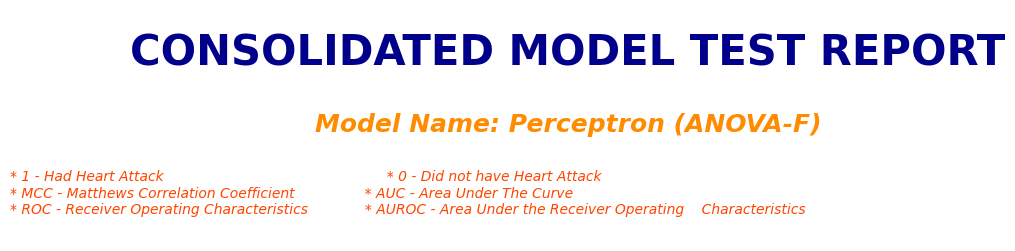

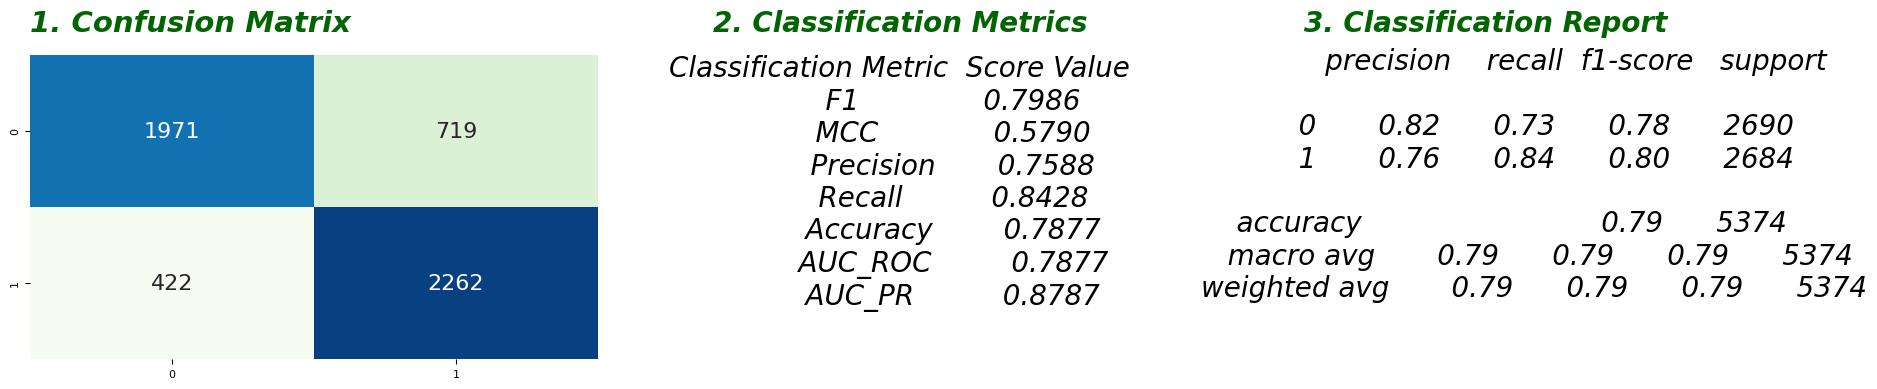

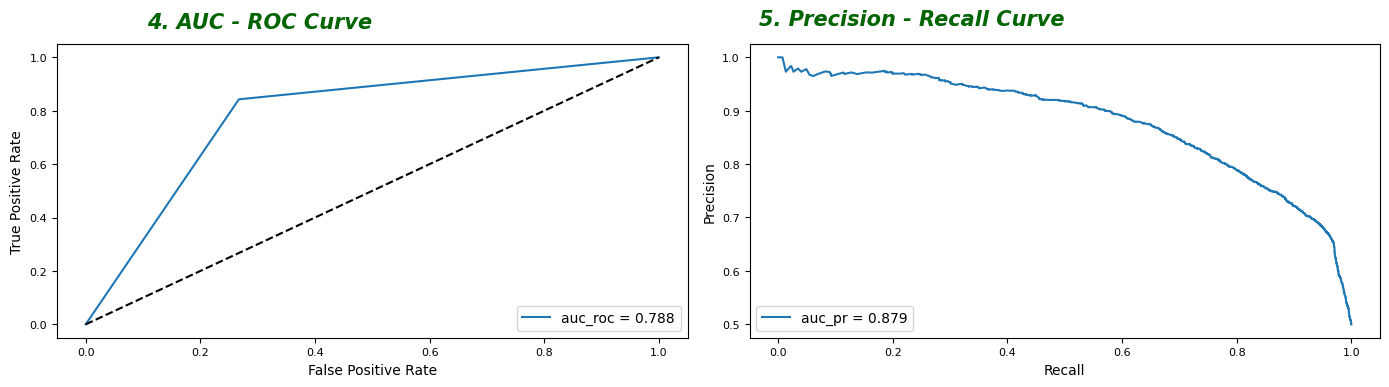

[[0.7985878199470433,
  0.5789614171623033,
  0.7588057698758806,
  0.8427719821162444,
  0.7876814291030889,
  0.7877428683815422,
  0.8787095969865952]]

In [338]:
Generate_Model_Test_Classification_Report(pModel, x_test_anova, y_test_anova, 'Perceptron (ANOVA-F)')

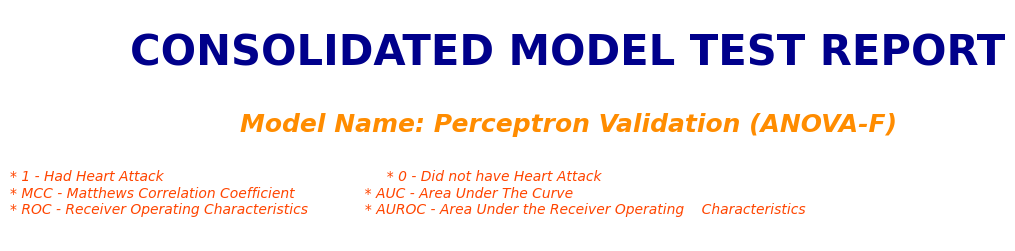

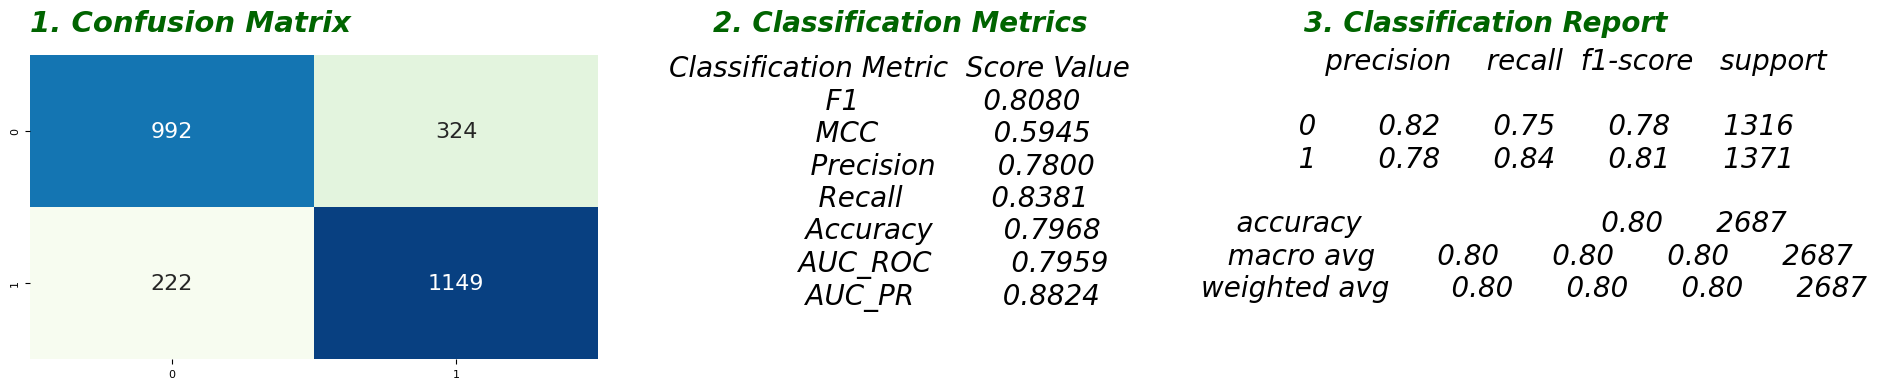

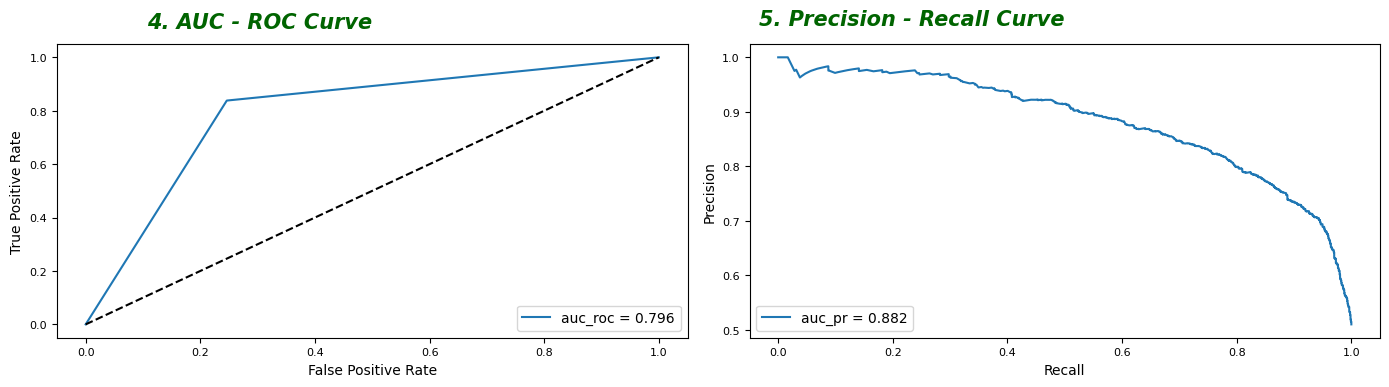

[[0.8080168776371308,
  0.5945180764785533,
  0.780040733197556,
  0.838074398249453,
  0.7967994045403796,
  0.7959368951733586,
  0.8823746626865409]]

In [339]:
Generate_Model_Test_Classification_Report(pModel, x_val_anova, y_val_anova, 'Perceptron Validation (ANOVA-F)')

In [340]:
from sklearn.linear_model import SGDClassifier

In [341]:
sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_anova, y_train_anova)
sgdResults=sgdModel.predict(x_test_anova)

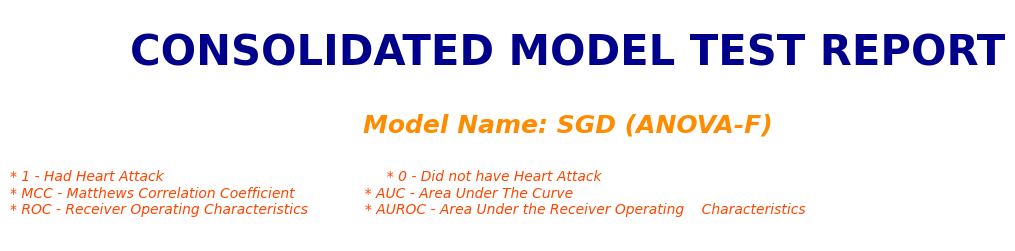

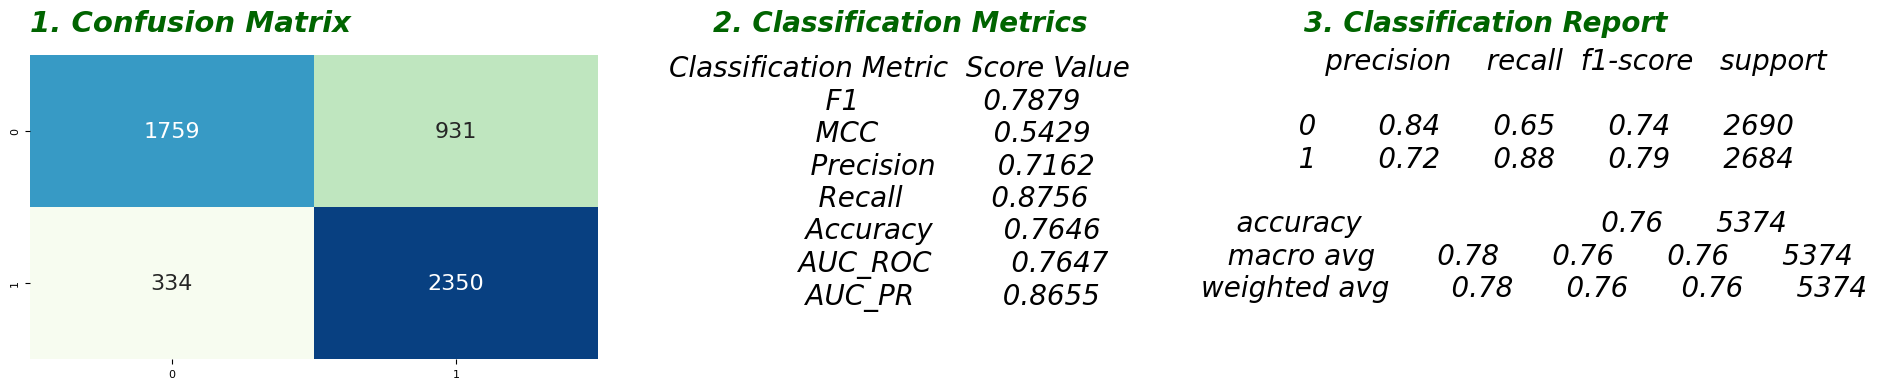

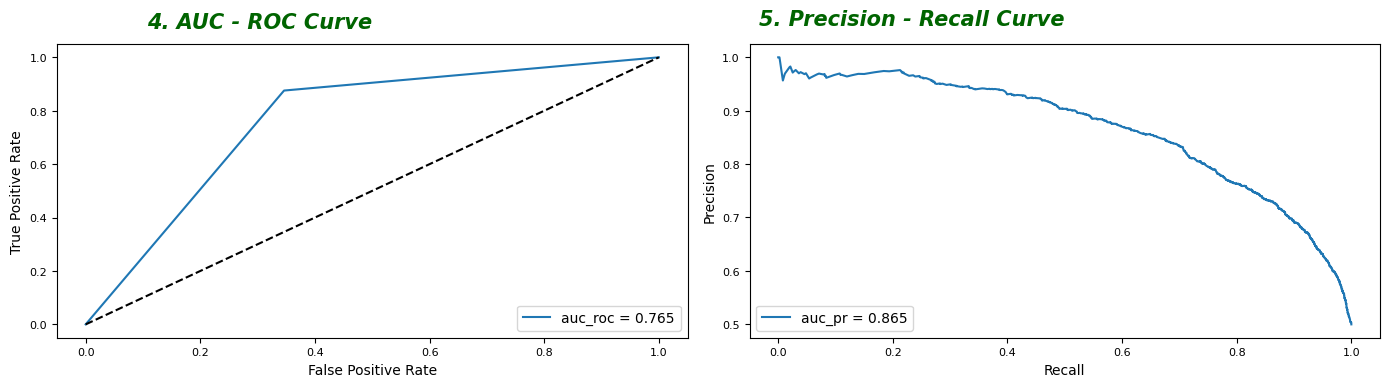

[[0.787929589270746,
  0.5428934938372364,
  0.7162450472416946,
  0.875558867362146,
  0.7646073688128023,
  0.7647311065435265,
  0.8654869692537336]]

In [342]:
Generate_Model_Test_Classification_Report(sgdModel, x_test_anova, y_test_anova, 'SGD (ANOVA-F)')

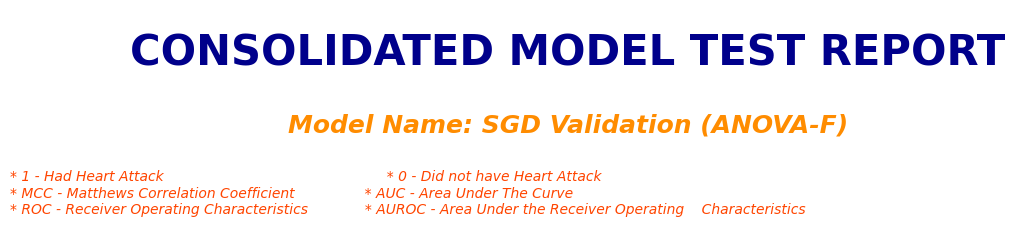

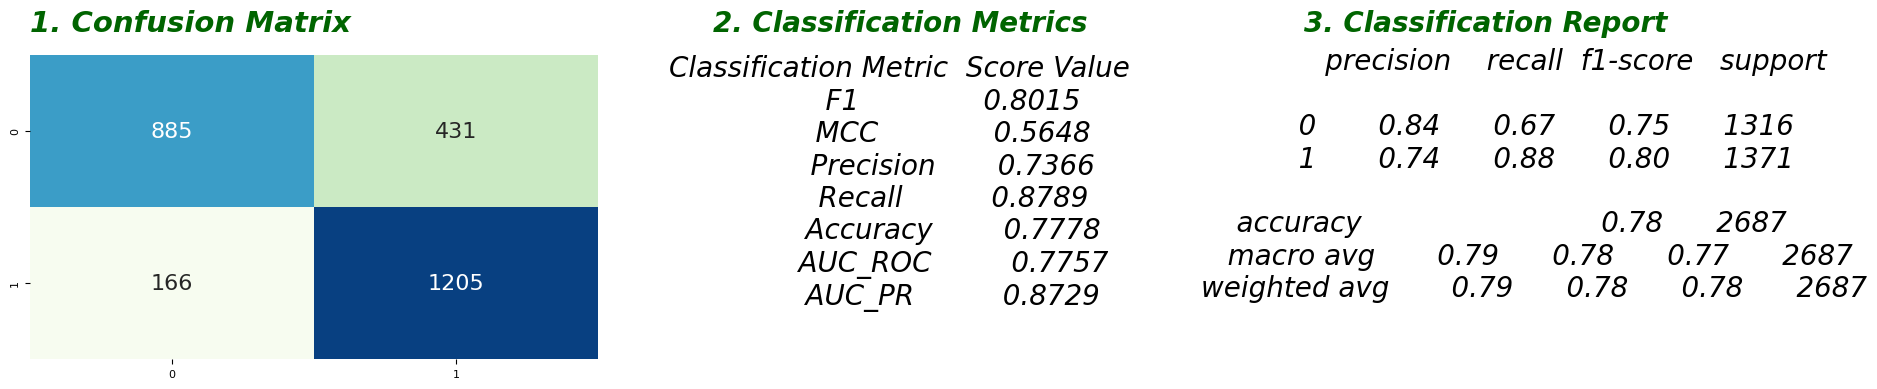

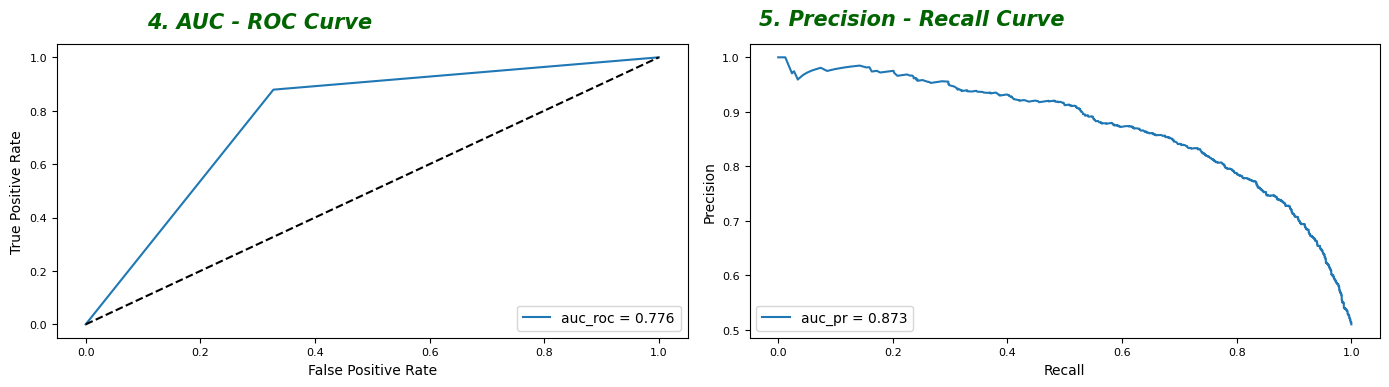

[[0.8014632524110409,
  0.5648466847758755,
  0.7365525672371638,
  0.8789204959883297,
  0.7778191291403052,
  0.7757064486020675,
  0.872860521163448]]

In [343]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_anova, y_val_anova, 'SGD Validation (ANOVA-F)')

In [344]:
from sklearn.linear_model import LogisticRegression

In [345]:
lrModel=LogisticRegression(max_iter=30000)
lrModel=lrModel.fit(x_train_anova, y_train_anova)
lrResults=lrModel.predict(x_test_anova)

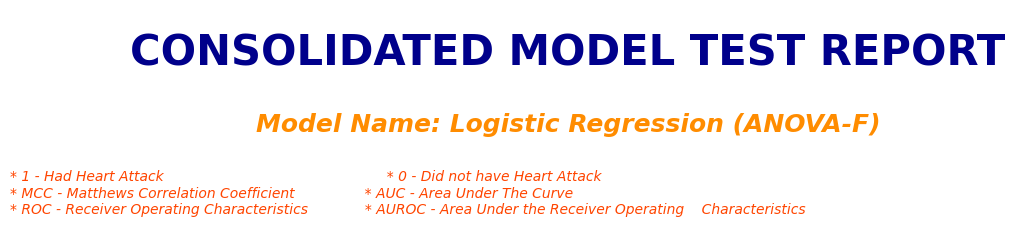

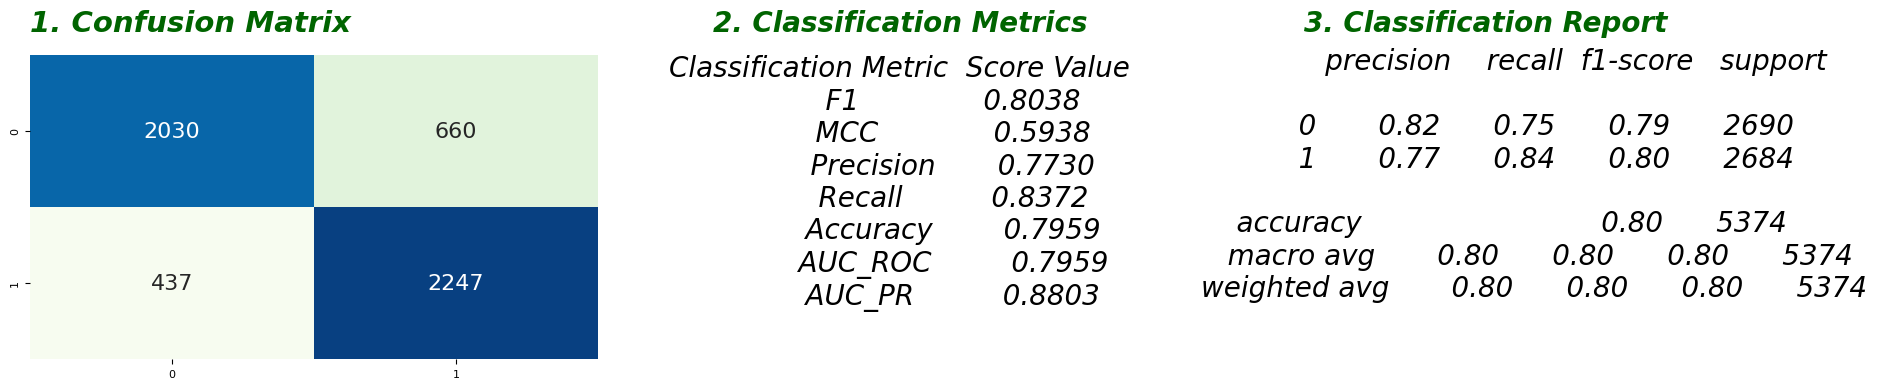

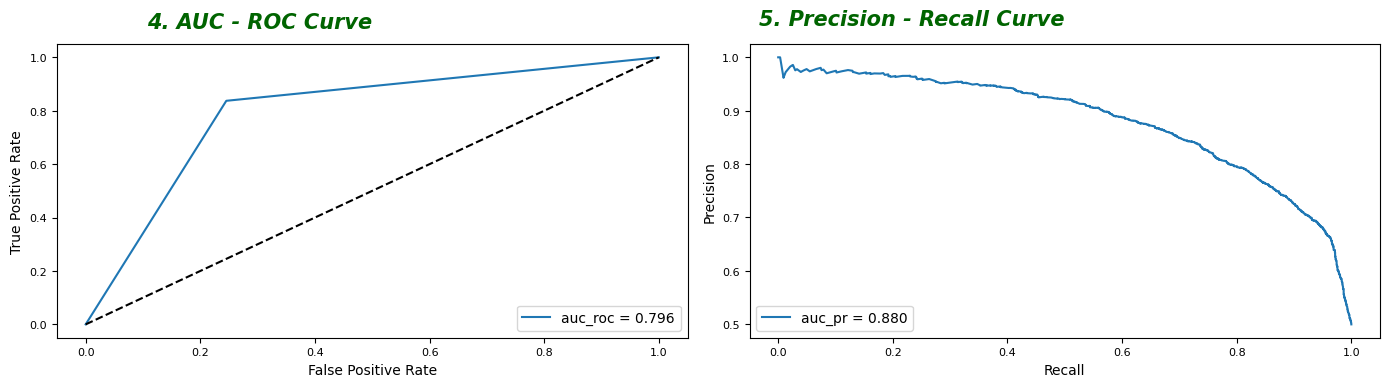

[[0.8037918082632803,
  0.5938235132305734,
  0.7729618163054696,
  0.837183308494784,
  0.7958689988835133,
  0.7959150743217415,
  0.8802937269287082]]

In [346]:
Generate_Model_Test_Classification_Report(lrModel, x_test_anova, y_test_anova, 'Logistic Regression (ANOVA-F)')

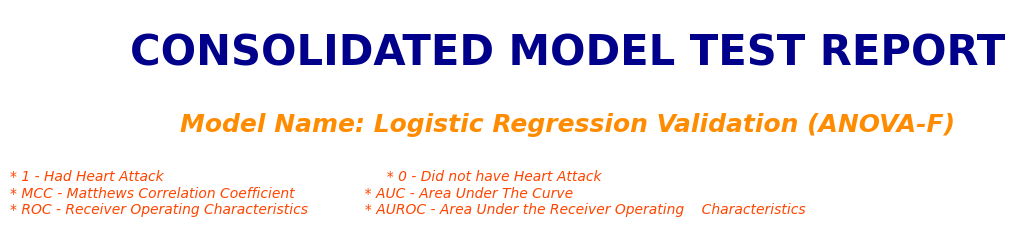

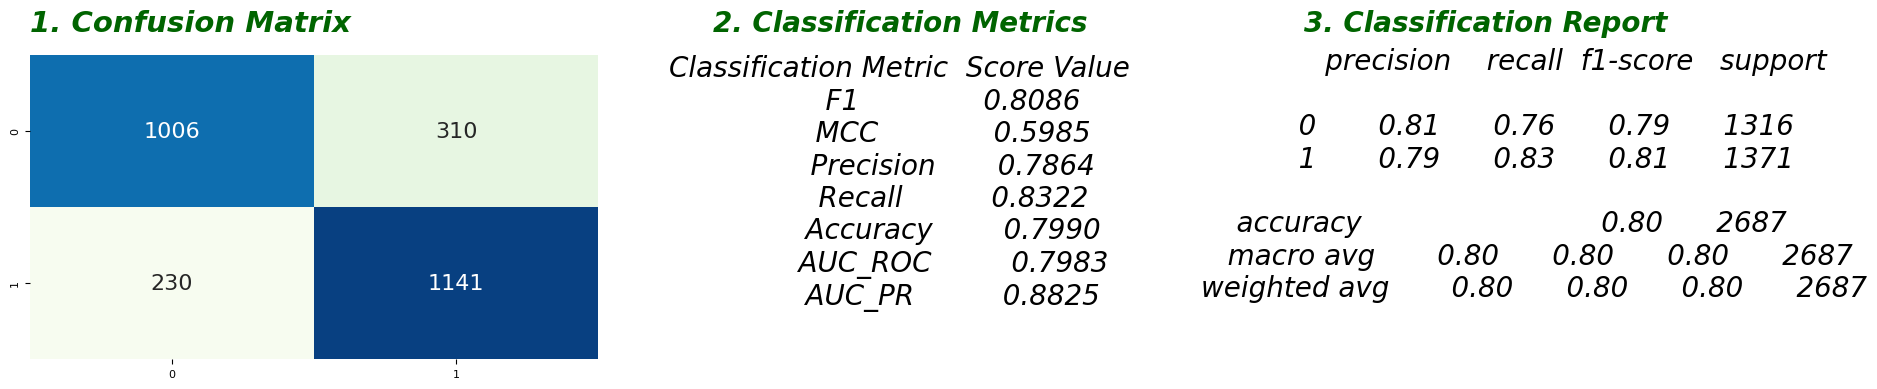

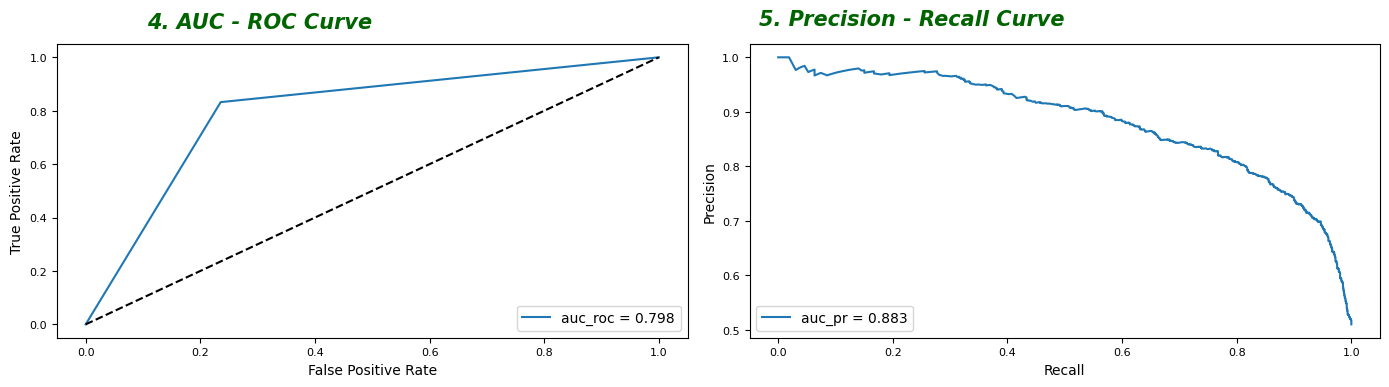

[[0.8086463501063077,
  0.5984708171069323,
  0.7863542384562371,
  0.8322392414296135,
  0.7990323781168589,
  0.7983384656996092,
  0.8825159325716594]]

In [347]:
Generate_Model_Test_Classification_Report(lrModel, x_val_anova, y_val_anova, 'Logistic Regression Validation (ANOVA-F)')

In [348]:
from sklearn.svm import LinearSVC
x_train_anova.shape

(18809, 10)

In [349]:
svmModel=CalibratedClassifierCV(LinearSVC(max_iter=300000))
svmModel=svmModel.fit(x_train_anova, y_train_anova)
svmResults=svmModel.predict(x_test_anova)

In [350]:
x_train_anova.shape

(18809, 10)

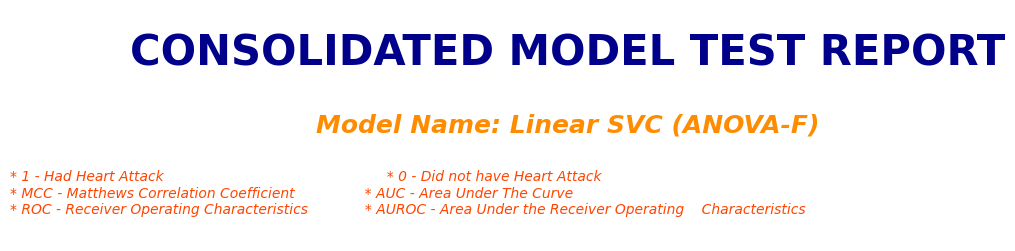

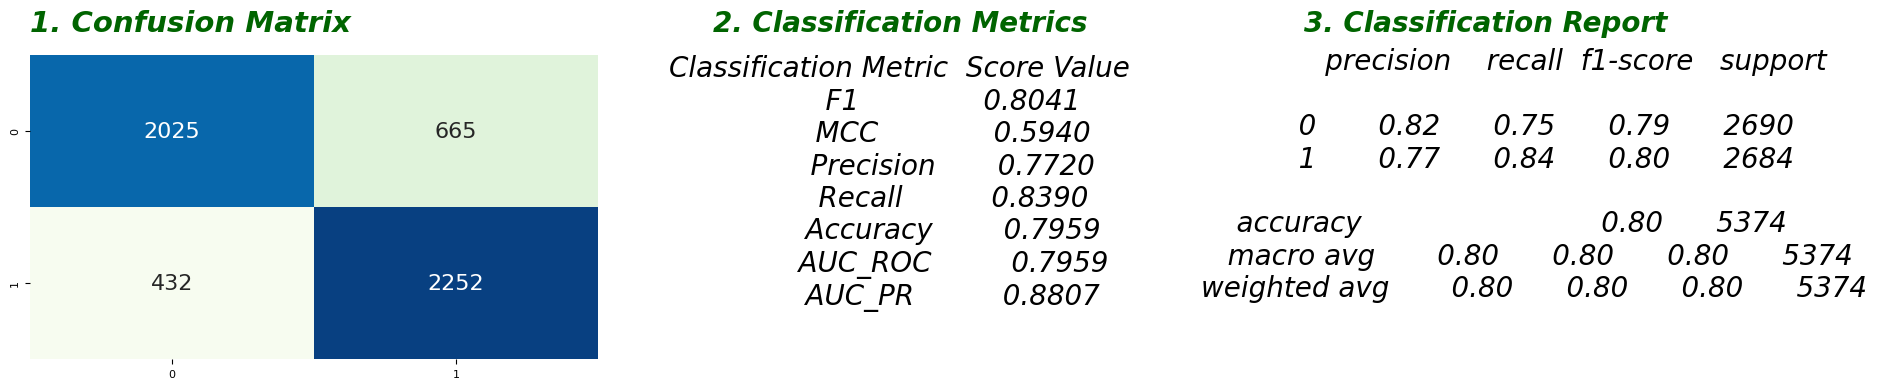

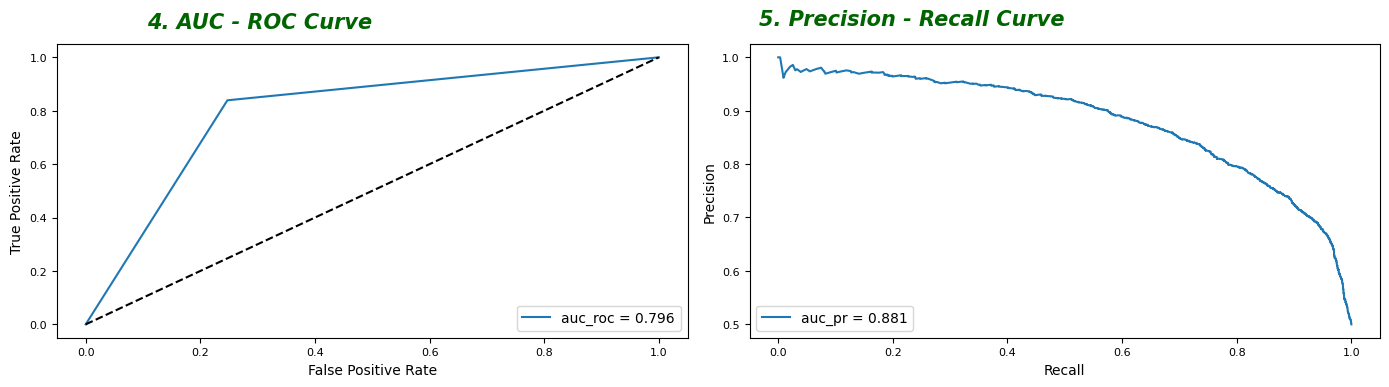

[[0.8041421174790216,
  0.5940140769266017,
  0.7720260541652383,
  0.8390461997019374,
  0.7958689988835133,
  0.7959171518955783,
  0.8806782214242097]]

In [351]:
Generate_Model_Test_Classification_Report(svmModel, x_test_anova, y_test_anova, 'Linear SVC (ANOVA-F)')

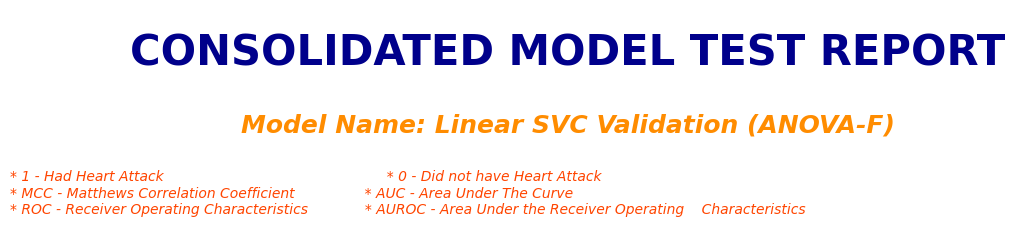

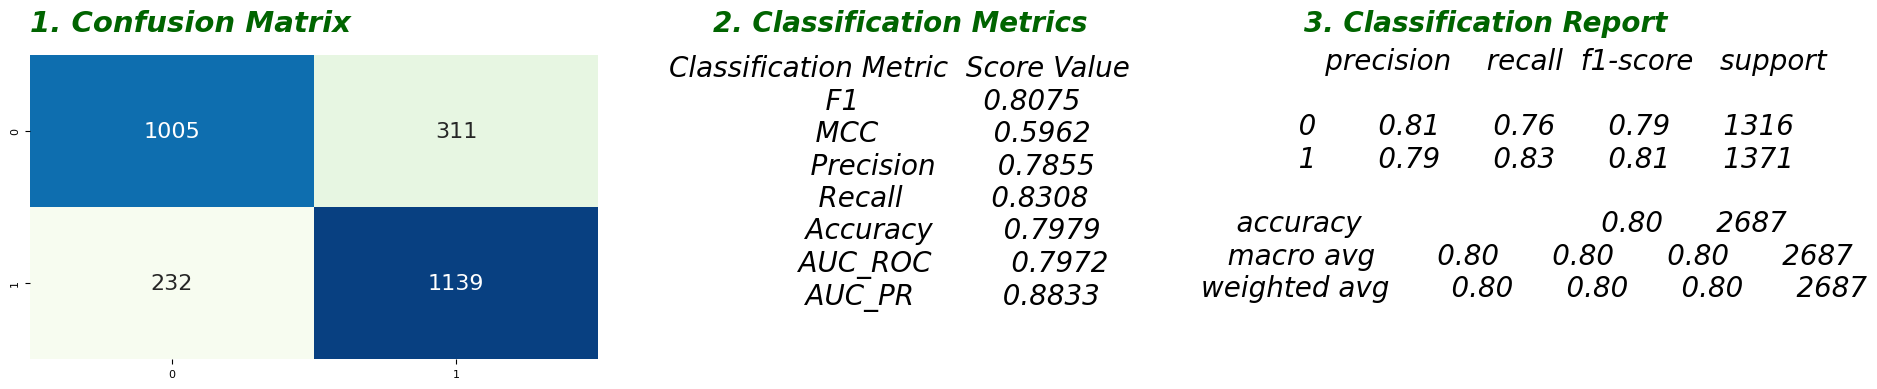

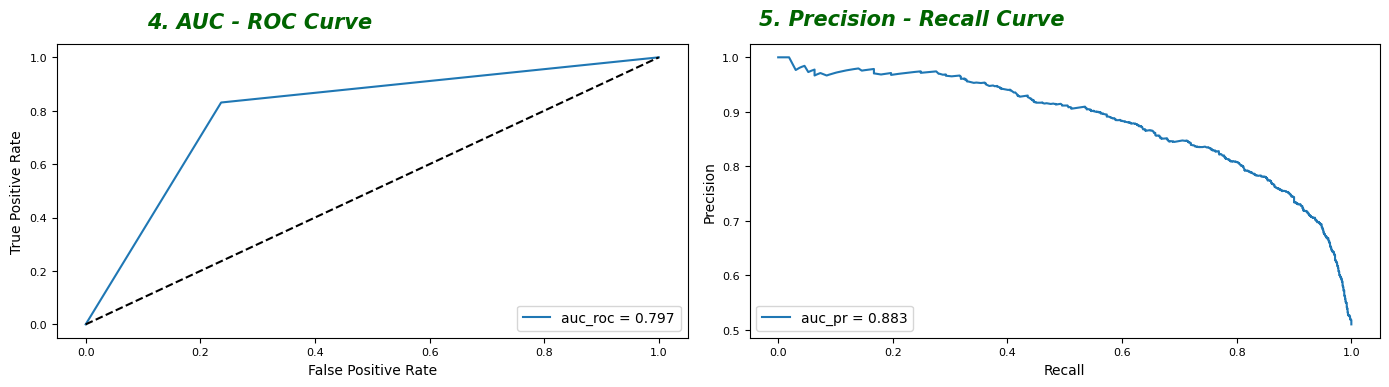

[[0.8075150655795817,
  0.5962099091239945,
  0.7855172413793103,
  0.8307804522246536,
  0.7979158913286193,
  0.7972291318874027,
  0.8833033903827059]]

In [352]:
Generate_Model_Test_Classification_Report(svmModel, x_val_anova, y_val_anova, 'Linear SVC Validation (ANOVA-F)')

## Chi Squared

In [363]:
x_train_chisq=x_train
x_test_chisq=x_test
y_train_chisq=y_train
y_test_chisq=y_test
x_val_chisq=x_val
y_val_chisq=y_val

In [364]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import chi2

In [365]:
chisq=SelectKBest(score_func=chi2, k=10)
chisq.fit(x_train_chisq, y_train_chisq)


SelectKBest(score_func=<function chi2 at 0x79e6f612cee0>)

In [366]:
x_train_chisq

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
100521     23    2              5                20.0               0.0   
113529     24    1              3                 8.0               0.0   
174517     39    2              3                 0.0               0.0   
168433     37    2              3                20.0               2.0   
58357      15    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
...                 ...                 ...         ...           ...   
100521                1                   2         6.0             4   
113529                1                   1         6.0             3   
174517                1                   1         7.0             4   
168433                1                   1         8.0             4   
58357                 1                   2         8.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
52276           1  ...            1.78             117.93  37.31   
8733            1  ...            1.68              85.73  30.51   
181315          2  ...            1.68              79.38  28.25   
74042           1  ...            1.68              65.77  23.40   
143498          1  ...            1.80              83.46  25.66   
...           ...  ...             ...                ...    ...   
100521          2  ...            1.52              58.97  25.39   
113529          1  ...            1.65              71.67  26.29   
174517          2  ...            1.60              75.30  29.41   
168433          2  ...            1.60              56.70  22.14   
58357           2  ...            1.63              81.65  30.90   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
...                 ...         ...           ...            ...   
100521                2           2             1              1   
113529                2           2             1              1   
174517                2           2             2              2   
168433                2           1             2              2   
58357                 2           1             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
...                   ...               ...       ...  
100521                  3                 2         2  
113529                  3                 2         3  
174517                  2                 2         1  
168433                  1           

In [367]:
a=chisq.get_support().tolist()
b=x_train_chisq.columns.tolist()

selectedVars2=[]
i=0

while i < len(a):
    if a[i]==True:
        selectedVars2.append(b[i])
    i=i+1

In [368]:
selectedVars2

['GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'RemovedTeeth',
 'HadAngina',
 'HadDiabetes',
 'ChestScan',
 'AgeCategory',
 'WeightInKilograms',
 'PneumoVaxEver']

In [369]:
chisq.get_support()

array([False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False])

In [370]:
x_train_chisq=x_train_chisq[selectedVars2]
x_test_chisq=x_test_chisq[selectedVars2]

x_val_chisq=x_val_chisq[selectedVars2]
x_val_chisq=x_val_chisq[selectedVars2]

In [371]:
x_train_chisq

GeneralHealth  PhysicalHealthDays  MentalHealthDays  RemovedTeeth  \
52276               4                 0.0               0.0             3   
8733                3                 0.0               0.0             2   
181315              2                 3.0               0.0             4   
74042               3                 0.0              30.0             2   
143498              3                 1.0               0.0             2   
...               ...                 ...               ...           ...   
100521              5                20.0               0.0             4   
113529              3                 8.0               0.0             3   
174517              3                 0.0               0.0             4   
168433              3                20.0               2.0             4   
58357               4                 0.0               0.0             1   

        HadAngina  HadDiabetes  ChestScan  AgeCategory  WeightInKilograms  \
52276           1            1          1           11             117.93   
8733            1            1          1           13              85.73   
181315          2            3          2           12              79.38   
74042           1            3          1           13              65.77   
143498          1            3          1           11              83.46   
...           ...          ...        ...          ...                ...   
100521          2            3          2           13              58.97   
113529          1            1          1           13              71.67   
174517          2            3          2            2              75.30   
168433          2            3          1            1              56.70   
58357           2            4          1            7              81.65   

        PneumoVaxEver  
52276               1  
8733                1  
181315              1  
74042               2  
143498              1  
...               ...  
100521              1  
113529              1  
174517              2  
168433              2  
58357               1  

[18809 rows x 10 columns]

In [372]:
x_test_chisq

GeneralHealth  PhysicalHealthDays  MentalHealthDays  RemovedTeeth  \
43188               1                 4.0              30.0             1   
176201              3                 0.0               0.0             3   
43939               4                20.0               0.0             3   
103610              3                 0.0               0.0             1   
136529              5                30.0              30.0             3   
...               ...                 ...               ...           ...   
207241              4                30.0               0.0             1   
126202              3                 0.0               0.0             1   
32311               2                 0.0               0.0             1   
159061              2                 0.0               0.0             3   
159281              3                 0.0               0.0             1   

        HadAngina  HadDiabetes  ChestScan  AgeCategory  WeightInKilograms  \
43188           2            3          1            8              99.79   
176201          2            1          2            9             113.40   
43939           1            1          1           12             113.40   
103610          2            3          1           10              58.97   
136529          1            1          1           12             115.67   
...           ...          ...        ...          ...                ...   
207241          2            3          2           11              88.45   
126202          2            3          1           12              63.50   
32311           2            3          1           12              61.23   
159061          2            1          2           10              86.18   
159281          2            3          2            8              83.91   

        PneumoVaxEver  
43188               1  
176201              2  
43939               1  
103610              1  
136529              1  
...               ...  
207241              2  
126202              1  
32311               1  
159061              1  
159281              1  

[5374 rows x 10 columns]

In [373]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_chisq, y_train_chisq)
pResults=pModel.predict(x_test_chisq)

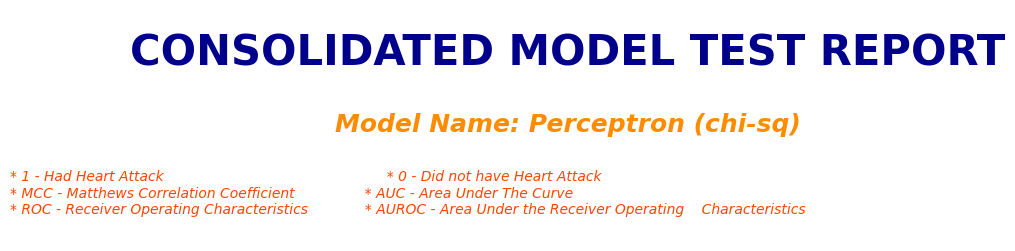

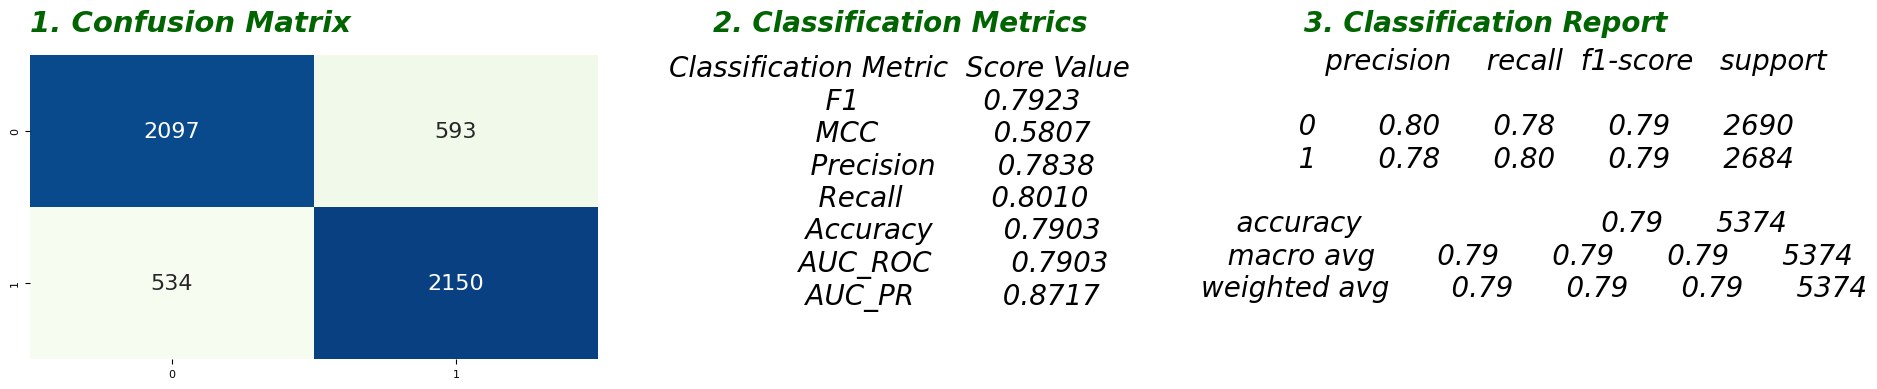

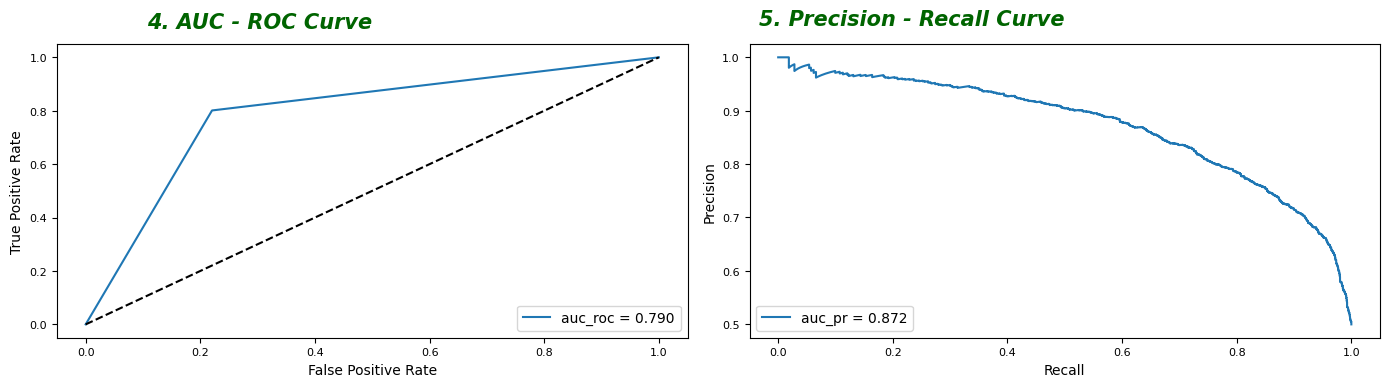

[[0.7923346231803943,
  0.5807228930042567,
  0.7838133430550492,
  0.801043219076006,
  0.7902865649423149,
  0.7902985612108654,
  0.8717171580259929]]

In [374]:
Generate_Model_Test_Classification_Report(pModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Perceptron (chi-sq)')

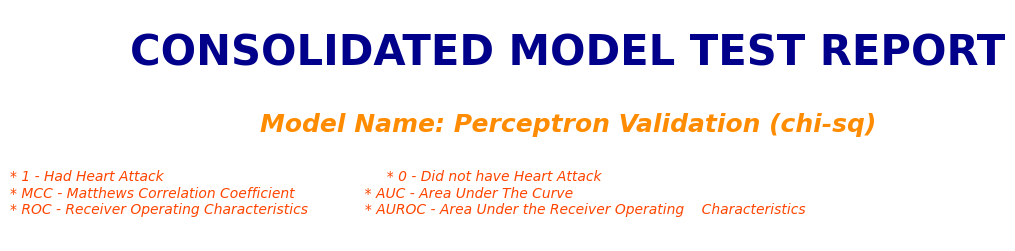

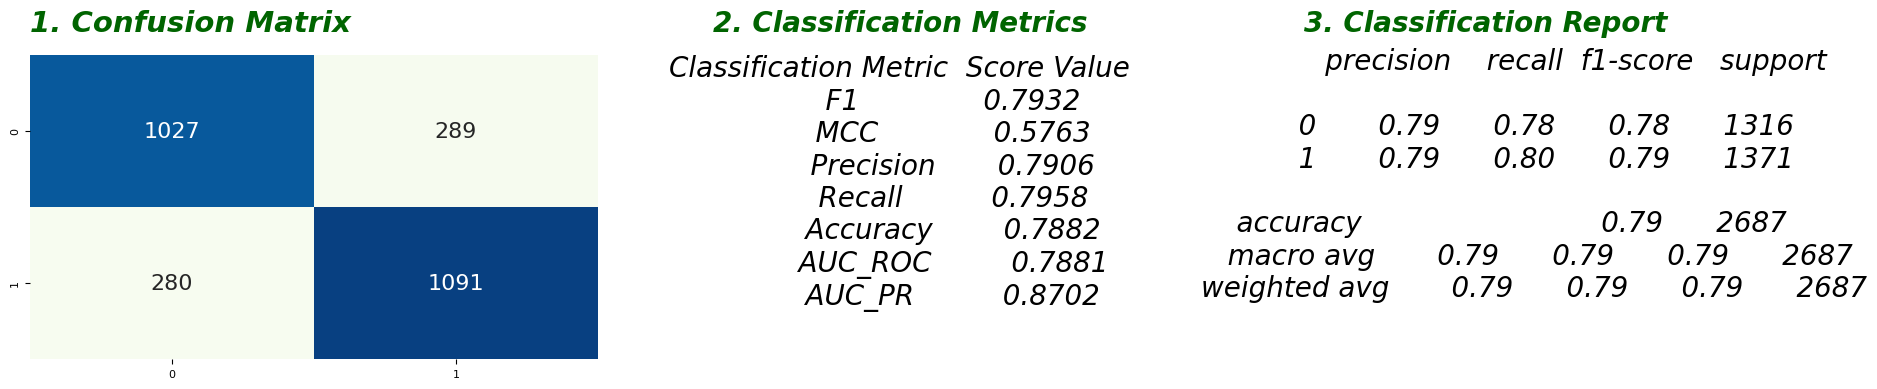

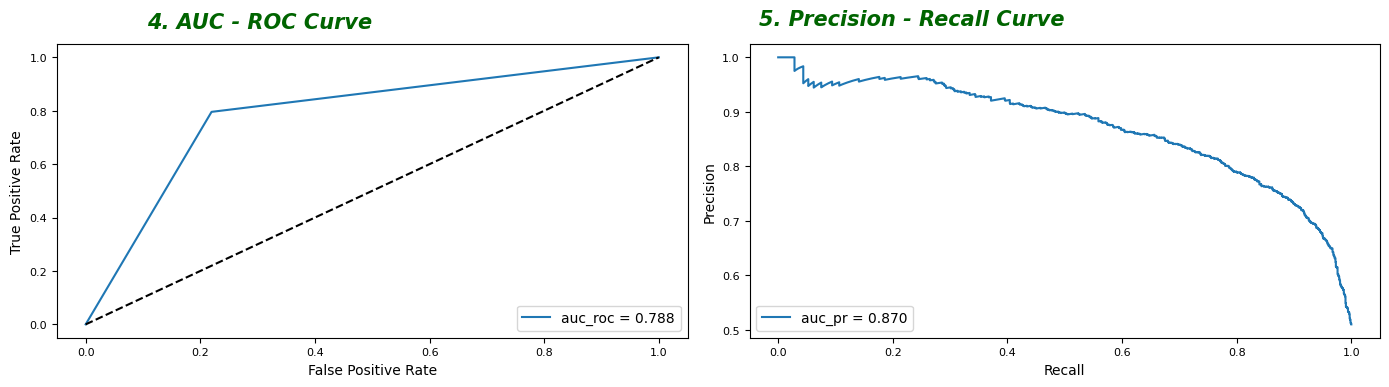

[[0.7931661214103963,
  0.5762566400183908,
  0.7905797101449276,
  0.7957695113056164,
  0.7882396724972088,
  0.788082324041866,
  0.8701798499081395]]

In [375]:
Generate_Model_Test_Classification_Report(pModel, x_val_chisq, y_val_chisq, 'Perceptron Validation (chi-sq)')

In [376]:
sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_chisq, y_train_chisq)
sgdResults=sgdModel.predict(x_test_chisq)

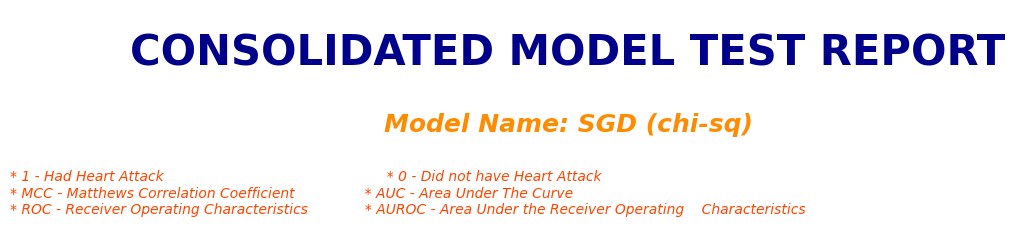

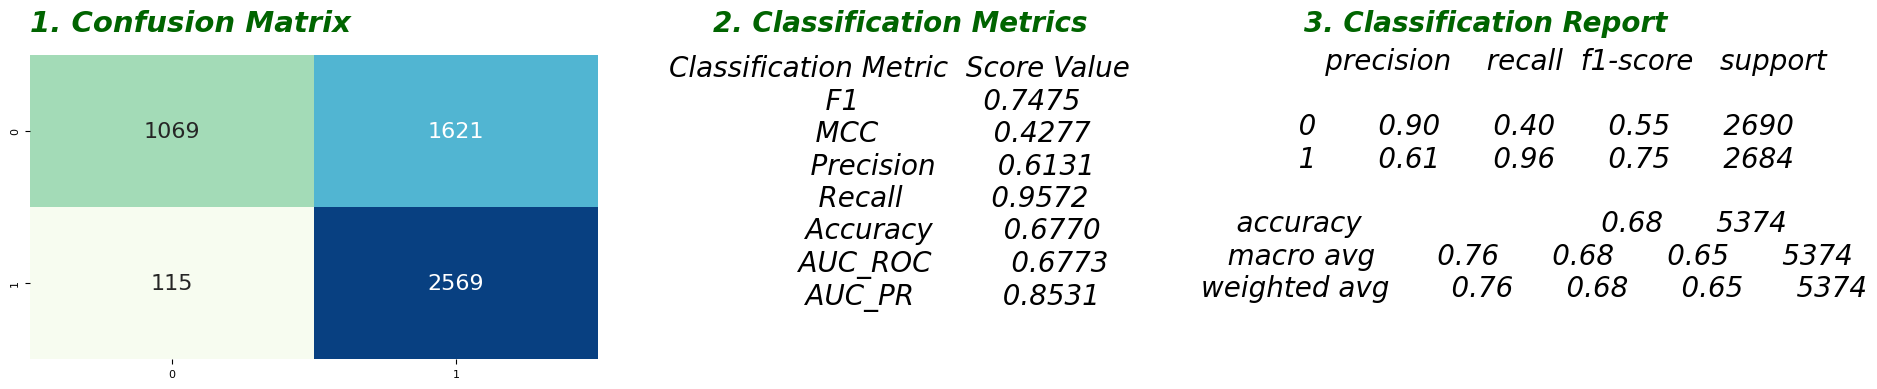

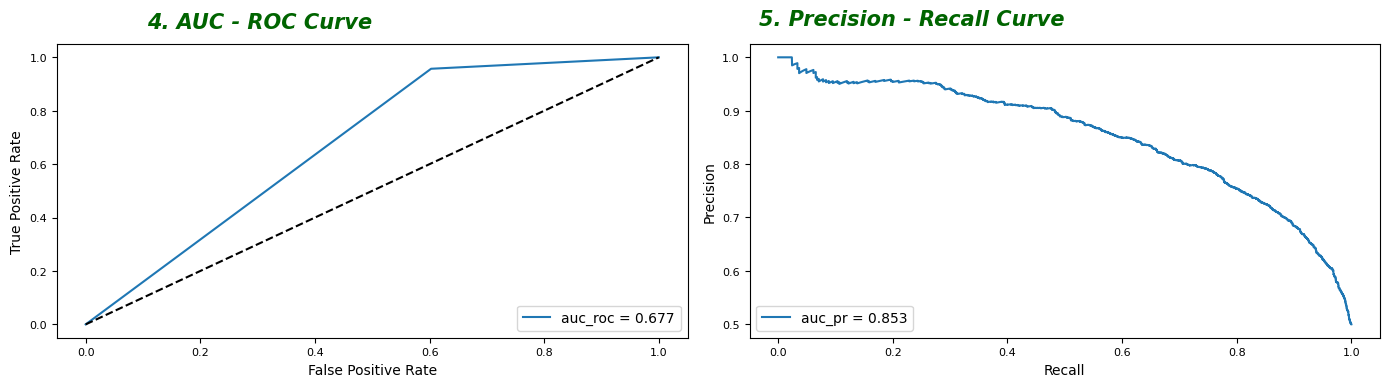

[[0.7474541751527496,
  0.4277239615465164,
  0.613126491646778,
  0.9571535022354695,
  0.6769631559359881,
  0.6772756358760991,
  0.8531343467445416]]

In [377]:
Generate_Model_Test_Classification_Report(sgdModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='SGD (chi-sq)')

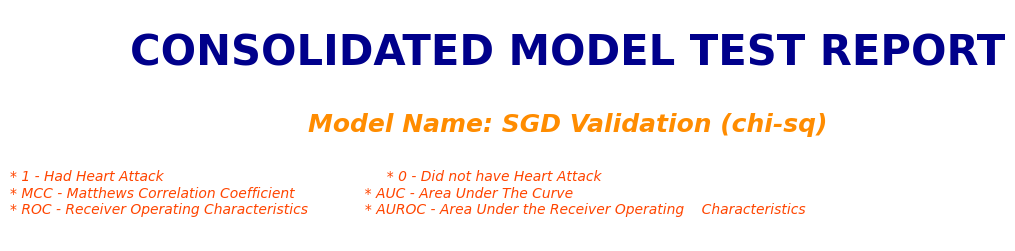

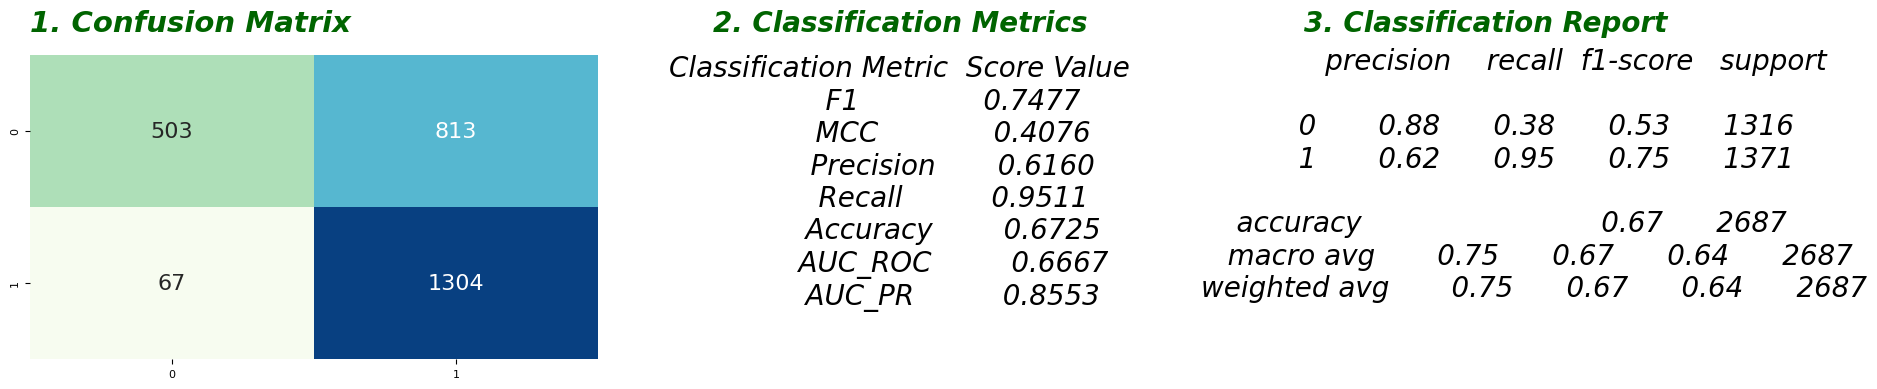

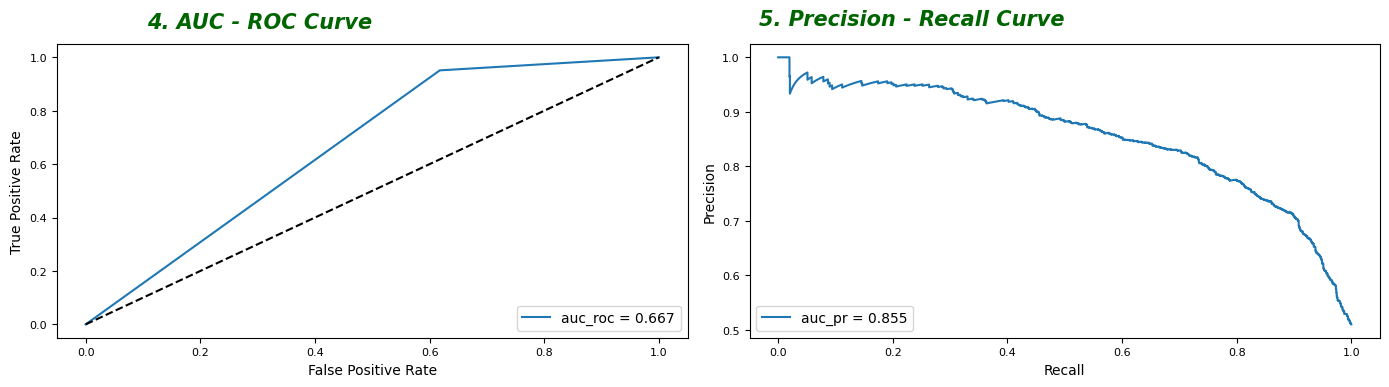

[[0.7477064220183487,
  0.40761344588638404,
  0.6159659896079358,
  0.9511305616338439,
  0.6724972087830294,
  0.6666747033093232,
  0.8553414257394769]]

In [378]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_chisq, y_val_chisq, 'SGD Validation (chi-sq)')

In [379]:
lrModel=LogisticRegression(max_iter=300000)
lrModel=lrModel.fit(x_train_chisq, y_train_chisq)
lrResults=lrModel.predict(x_test_chisq)

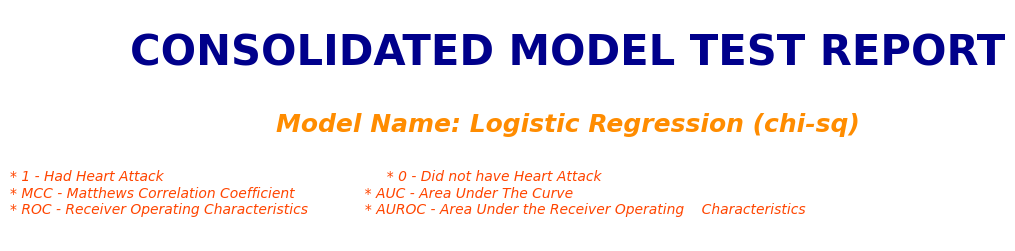

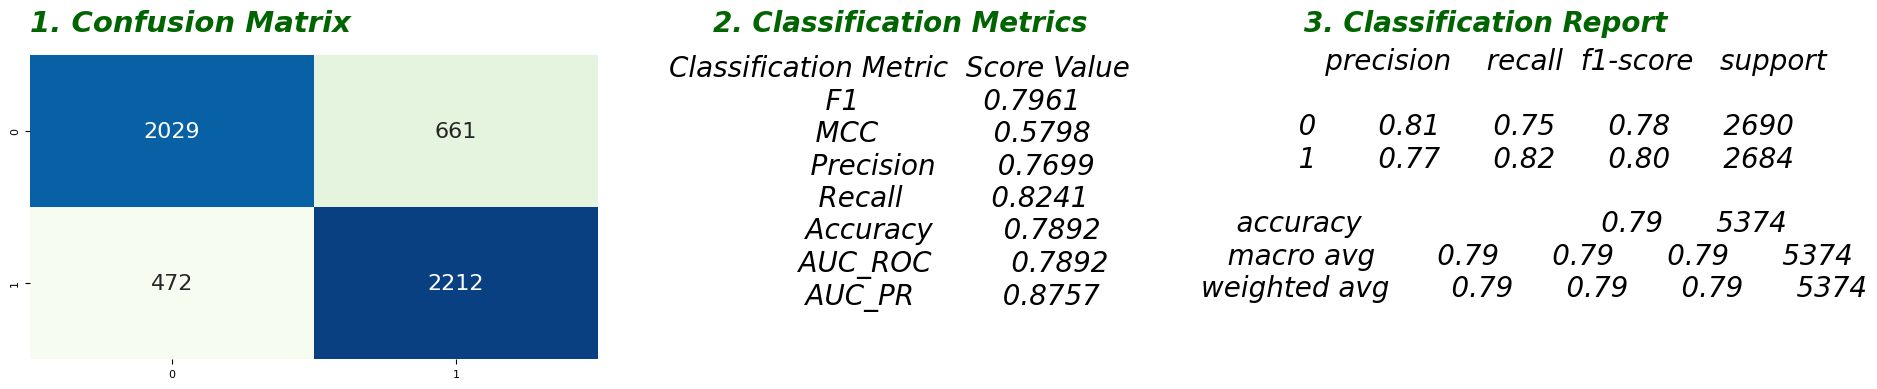

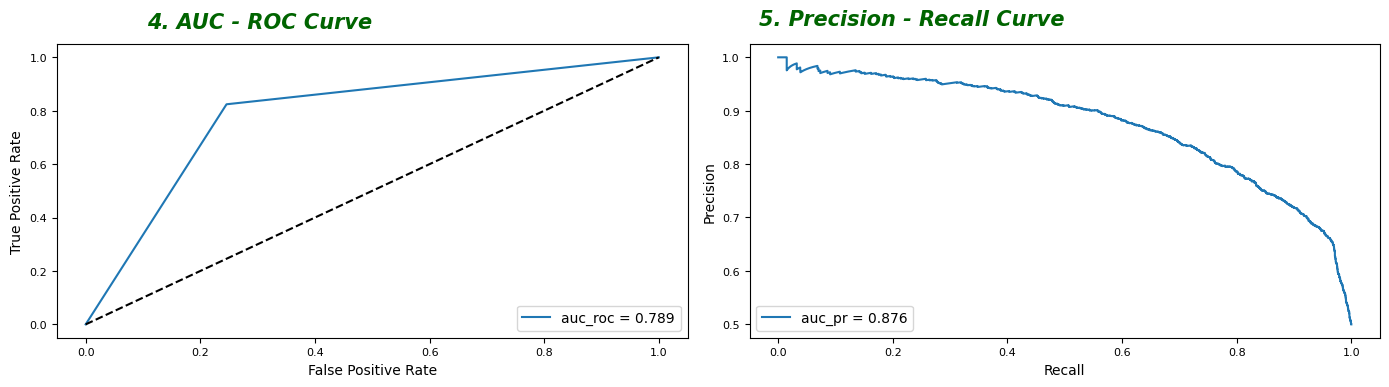

[[0.7961130106172394,
  0.5798086080014699,
  0.769926905673512,
  0.8241430700447094,
  0.7891700781540751,
  0.7892090814907562,
  0.8757220035511579]]

In [380]:
Generate_Model_Test_Classification_Report(lrModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Logistic Regression (chi-sq)')

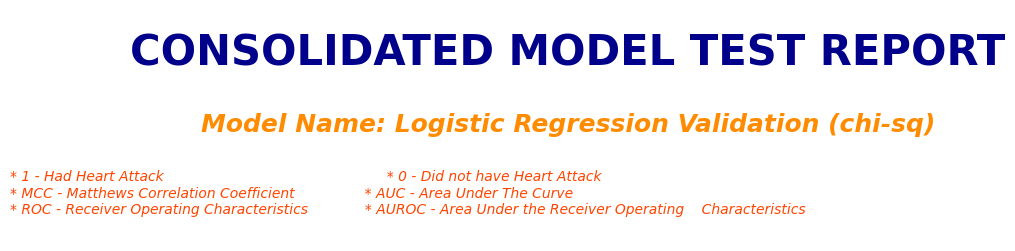

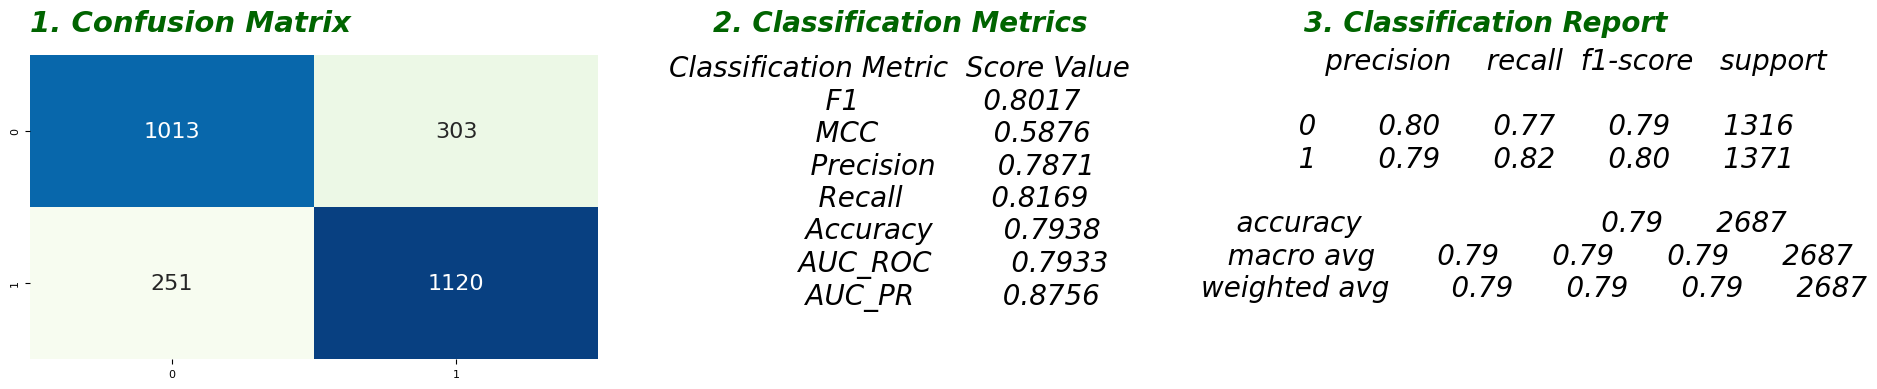

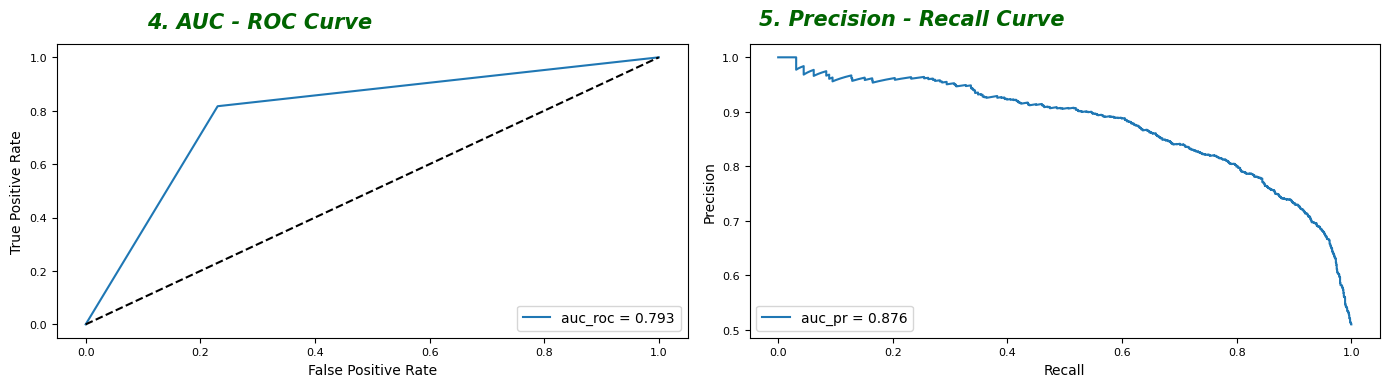

[[0.8017179670722978,
  0.5875855071582814,
  0.7870695713281799,
  0.8169219547775346,
  0.7938221064384071,
  0.7933393968416549,
  0.8755564677848646]]

In [381]:
Generate_Model_Test_Classification_Report(lrModel, x_val_chisq, y_val_chisq, 'Logistic Regression Validation (chi-sq)')

In [382]:
svmModel=CalibratedClassifierCV(LinearSVC(max_iter=50000))
svmModel=svmModel.fit(x_train_chisq, y_train_chisq)
svmResults=svmModel.predict(x_test_chisq)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


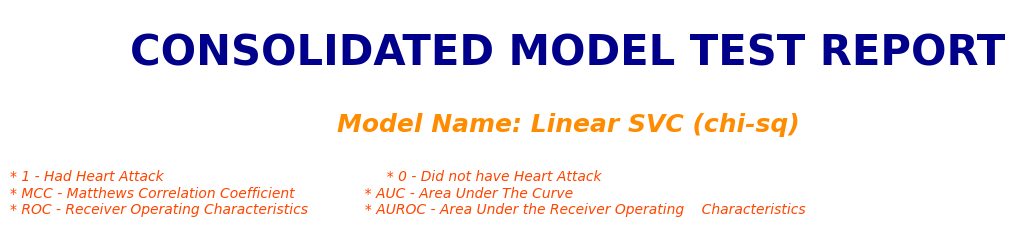

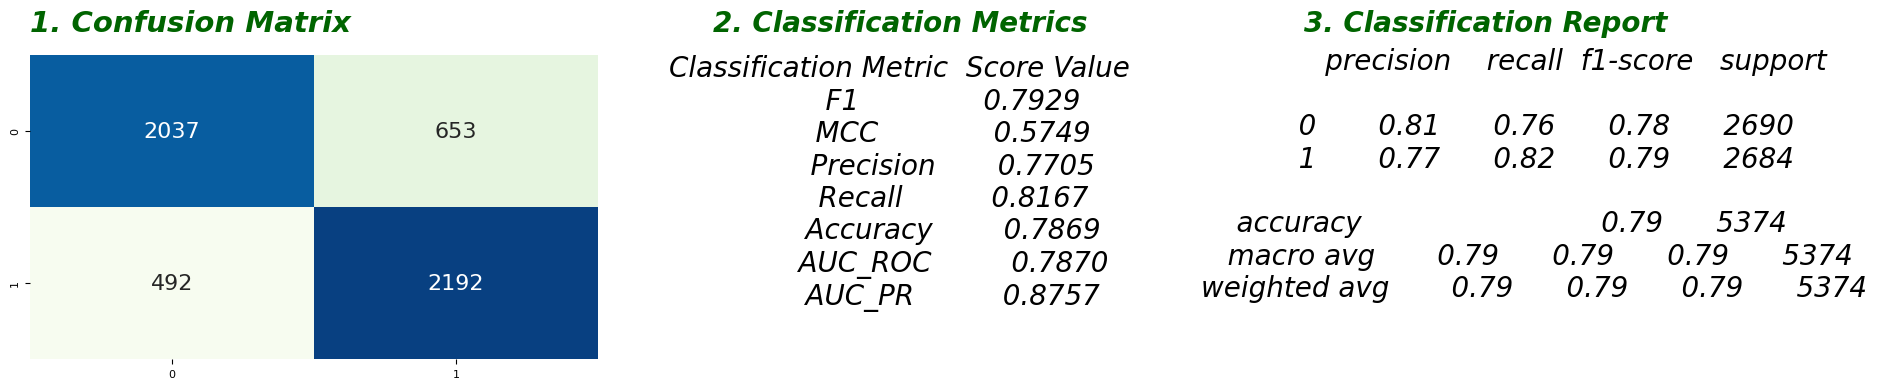

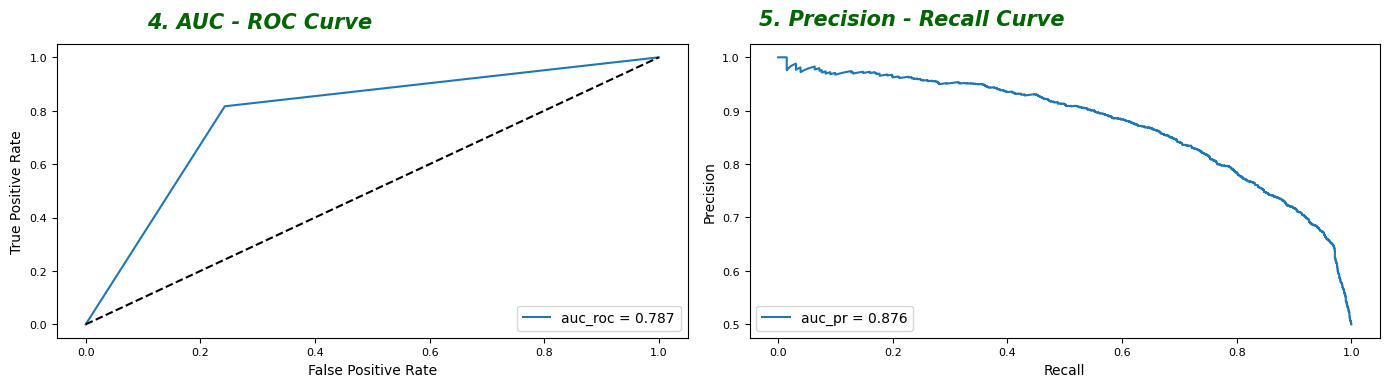

[[0.7929101103273648,
  0.5749350358544295,
  0.7704745166959578,
  0.8166915052160953,
  0.7869371045775958,
  0.7869702879240328,
  0.8757244701832277]]

In [383]:
Generate_Model_Test_Classification_Report(svmModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Linear SVC (chi-sq)')

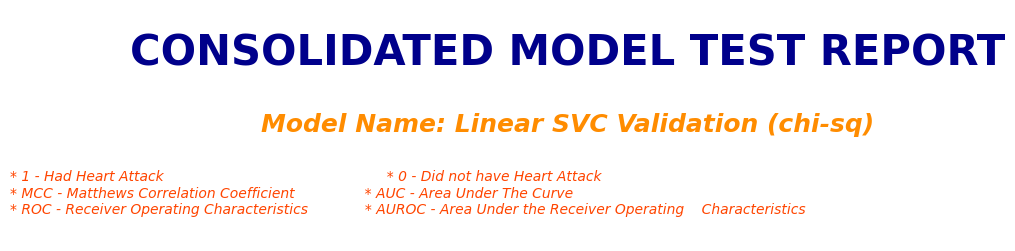

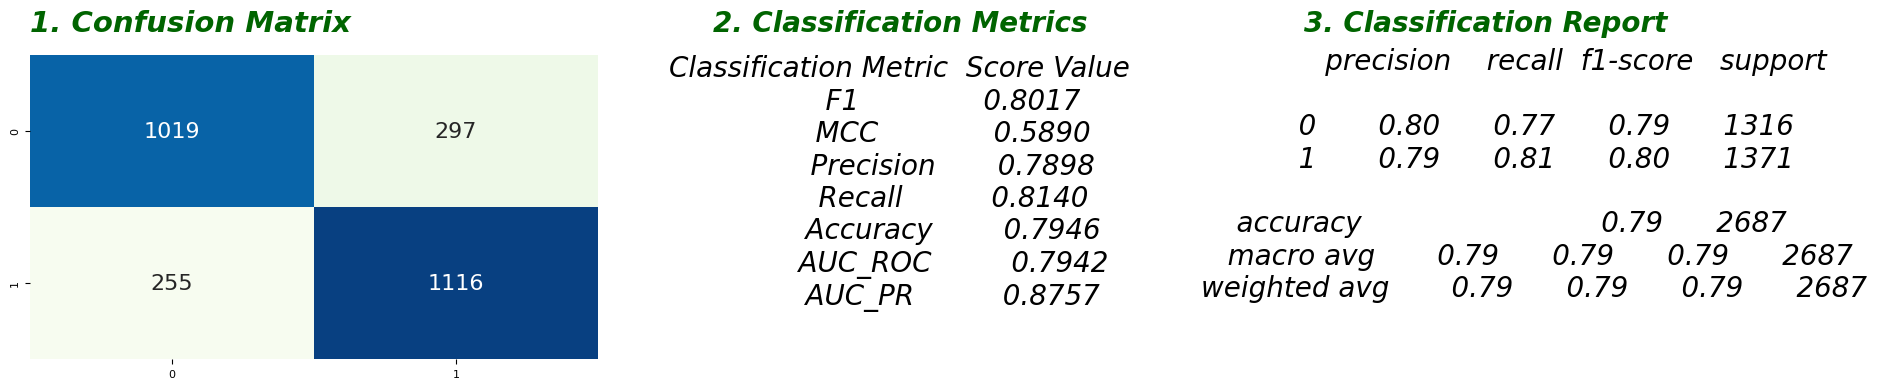

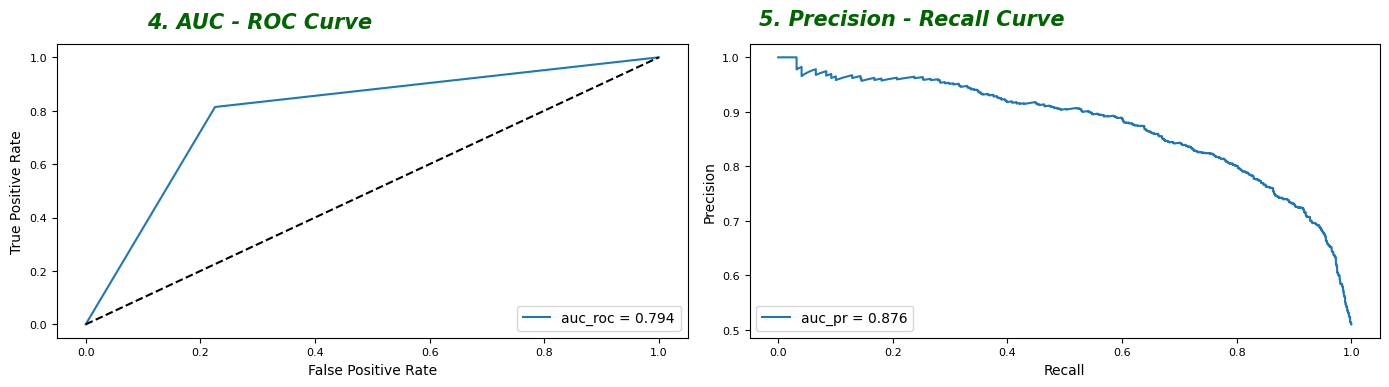

[[0.8017241379310346,
  0.5889858323295167,
  0.7898089171974523,
  0.8140043763676149,
  0.7945664309639002,
  0.7941602428950537,
  0.8757035109057731]]

In [384]:
Generate_Model_Test_Classification_Report(svmModel, x_val_chisq, y_val_chisq, 'Linear SVC Validation (chi-sq)')

## LASSO Feature Selection

In [385]:
#Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import preprocessing

data_original = pd.read_csv('heart_data_cleaned.csv')

data_original['HadHeartAttack'].replace(to_replace={1:0, 2:1}, inplace=True)

opLabel = np.array(data_original['HadHeartAttack'])
data = data_original.drop(columns='HadHeartAttack')

featureVote = np.zeros(data.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(opLabel==0)[0]   #heart attack
    label1_indx = np.where(opLabel==1)[0]   #no heart attack
    numTrainData0 = 13000
    numTrainData1 = 13000
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)

    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]

    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)
    trainData  =  data.iloc[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  data.iloc[testIndx]
    testLabel  =  opLabel[testIndx]

    ##%% data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)

    ##%% Lasso from scikit

    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)

    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1

(39,)


In [386]:
print(featureVote)
print(iter)

[  0. 100. 100.   0.  11. 100.  72.  66. 100. 100. 100.   5.   1.  99.
   4.  44.  99. 100. 100.  98.  95. 100.   0.  64. 100.  15. 100.  53.
 100.   0.   0.   8. 100.   0.  89.  93.  85.   2.  29.]
<built-in function iter>


In [387]:
# feature nomination via Lasso (from feature 1 to 30)
# We keep the dummy variables
varb = np.array(data.columns)

thresH = 6
featureIndx = np.where(featureVote[0:38]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(39,data.shape[1]))
print(varb[featureIndx])

featureDrop = np.where(featureVote[0:38]<thresH)[0]
print(varb[featureDrop])

['Sex' 'GeneralHealth' 'MentalHealthDays' 'LastCheckupTime'
 'PhysicalActivities' 'SleepHours' 'RemovedTeeth' 'HadAngina' 'HadStroke'
 'HadCOPD' 'HadKidneyDisease' 'HadArthritis' 'HadDiabetes'
 'DeafOrHardOfHearing' 'BlindOrVisionDifficulty' 'DifficultyConcentrating'
 'DifficultyWalking' 'DifficultyErrands' 'SmokerStatus' 'ECigaretteUsage'
 'ChestScan' 'RaceEthnicityCategory' 'AgeCategory' 'BMI' 'AlcoholDrinkers'
 'FluVaxLast12' 'PneumoVaxEver' 'TetanusLast10Tdap']
['State' 'PhysicalHealthDays' 'HadAsthma' 'HadSkinCancer'
 'HadDepressiveDisorder' 'DifficultyDressingBathing' 'HeightInMeters'
 'WeightInKilograms' 'HIVTesting' 'HighRiskLastYear']


In [388]:
Drop = ['State', 'PhysicalHealthDays', 'HadAsthma','HadSkinCancer', 'HadDepressiveDisorder', 'DifficultyDressingBathing', 'HeightInMeters', 'WeightInKilograms', 'HIVTesting', 'HighRiskLastYear']

In [389]:
x_train_lasso=x_train
x_test_lasso=x_test
y_train_lasso=y_train
y_test_lasso=y_test
x_val_lasso=x_val
y_val_lasso=y_val

In [390]:
x_train_lasso

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
52276      13    1              4                 0.0               0.0   
8733        3    1              3                 0.0               0.0   
181315     41    2              2                 3.0               0.0   
74042      18    2              3                 0.0              30.0   
143498     33    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
100521     23    2              5                20.0               0.0   
113529     24    1              3                 8.0               0.0   
174517     39    2              3                 0.0               0.0   
168433     37    2              3                20.0               2.0   
58357      15    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
52276                 1                   1         8.0             3   
8733                  1                   2         7.0             2   
181315                1                   1         8.0             4   
74042                 1                   1         8.0             2   
143498                1                   1         7.0             2   
...                 ...                 ...         ...           ...   
100521                1                   2         6.0             4   
113529                1                   1         6.0             3   
174517                1                   1         7.0             4   
168433                1                   1         8.0             4   
58357                 1                   2         8.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
52276           1  ...            1.78             117.93  37.31   
8733            1  ...            1.68              85.73  30.51   
181315          2  ...            1.68              79.38  28.25   
74042           1  ...            1.68              65.77  23.40   
143498          1  ...            1.80              83.46  25.66   
...           ...  ...             ...                ...    ...   
100521          2  ...            1.52              58.97  25.39   
113529          1  ...            1.65              71.67  26.29   
174517          2  ...            1.60              75.30  29.41   
168433          2  ...            1.60              56.70  22.14   
58357           2  ...            1.63              81.65  30.90   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
52276                 2           2             1              1   
8733                  1           2             2              1   
181315                2           2             1              1   
74042                 2           1             1              2   
143498                1           1             1              1   
...                 ...         ...           ...            ...   
100521                2           2             1              1   
113529                2           2             1              1   
174517                2           2             2              2   
168433                2           1             2              2   
58357                 2           1             1              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
52276                   1                 2         2  
8733                    4                 2         2  
181315                  4                 2         2  
74042                   3                 2         2  
143498                  1                 2         2  
...                   ...               ...       ...  
100521                  3                 2         2  
113529                  3                 2         3  
174517                  2                 2         1  
168433                  1           

In [391]:
x_train_lasso=x_train_lasso.drop(columns = Drop)
x_test_lasso=x_test_lasso.drop(columns = Drop)

x_val_lasso=x_val_lasso.drop(columns = Drop)

In [392]:
x_train_lasso

Sex  GeneralHealth  MentalHealthDays  LastCheckupTime  \
52276     1              4               0.0                1   
8733      1              3               0.0                1   
181315    2              2               0.0                1   
74042     2              3              30.0                1   
143498    1              3               0.0                1   
...     ...            ...               ...              ...   
100521    2              5               0.0                1   
113529    1              3               0.0                1   
174517    2              3               0.0                1   
168433    2              3               2.0                1   
58357     1              4               0.0                1   

        PhysicalActivities  SleepHours  RemovedTeeth  HadAngina  HadStroke  \
52276                    1         8.0             3          1          2   
8733                     2         7.0             2          1          1   
181315                   1         8.0             4          2          2   
74042                    1         8.0             2          1          2   
143498                   1         7.0             2          1          2   
...                    ...         ...           ...        ...        ...   
100521                   2         6.0             4          2          2   
113529                   1         6.0             3          1          1   
174517                   1         7.0             4          2          2   
168433                   1         8.0             4          2          2   
58357                    2         8.0             1          2          2   

        HadCOPD  ...  ECigaretteUsage  ChestScan  RaceEthnicityCategory  \
52276         2  ...                1          1                      1   
8733          2  ...                1          1                      1   
181315        2  ...                1          2                      1   
74042         2  ...                1          1                      1   
143498        2  ...                1          1                      1   
...         ...  ...              ...        ...                    ...   
100521        1  ...                1          2                      1   
113529        2  ...                1          1                      1   
174517        2  ...                4          2                      2   
168433        2  ...                2          1                      1   
58357         2  ...                1          1                      1   

        AgeCategory    BMI  AlcoholDrinkers  FluVaxLast12  PneumoVaxEver  \
52276            11  37.31                2             1              1   
8733             13  30.51                1             2              1   
181315           12  28.25                2             1              1   
74042            13  23.40                2             1              2   
143498           11  25.66                1             1              1   
...             ...    ...              ...           ...            ...   
100521           13  25.39                2             1              1   
113529           13  26.29                2             1              1   
174517            2  29.41                2             2              2   
168433            1  22.14                2             2              2   
58357             7  30.90                2             1              1   

        TetanusLast10Tdap  CovidPos  
52276                   1         2  
8733                    4         2  
181315                  4         2  
74042                   3         2  
143498                  1         2  
...                   ...       ...  
100521                  3         2  
113529                  3         3  
174517                  2         1  
168433                  1         1  
58357                   3         2  

[18809 rows x 29 co

In [393]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_lasso, y_train_lasso)
pResults=pModel.predict(x_test_lasso)

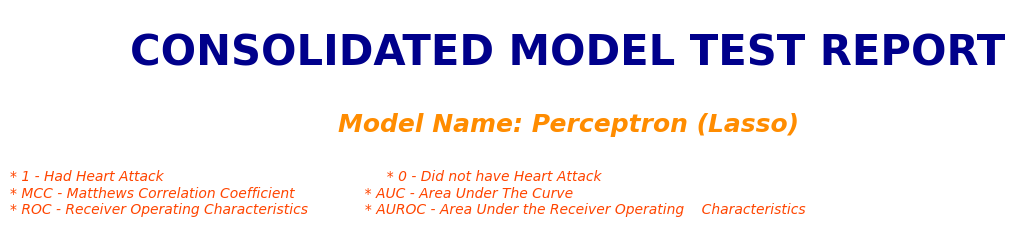

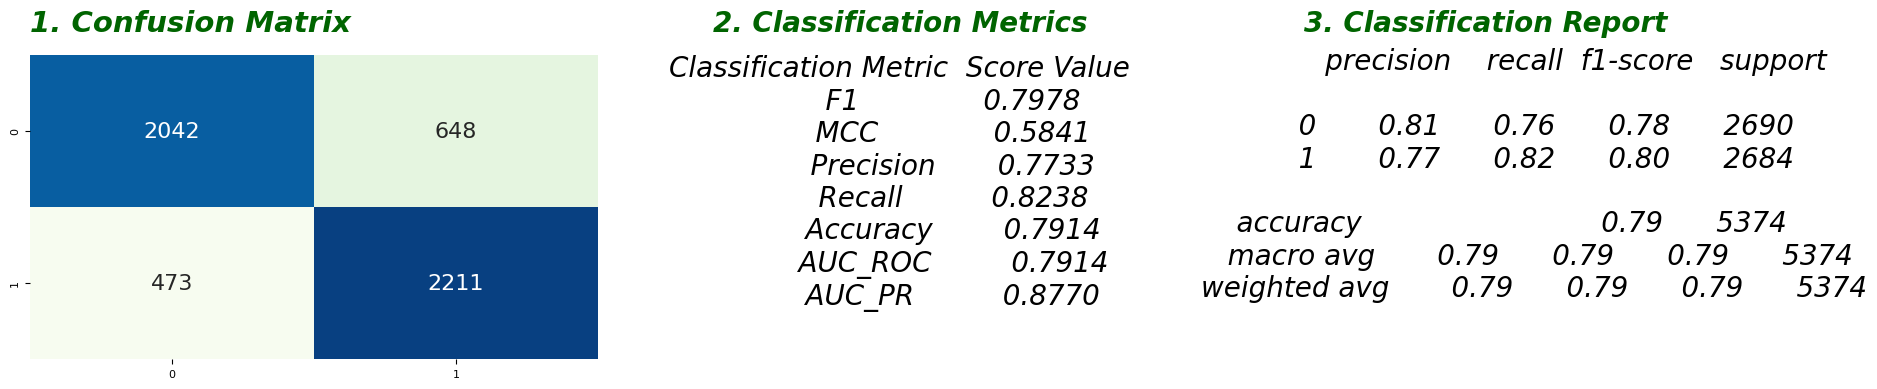

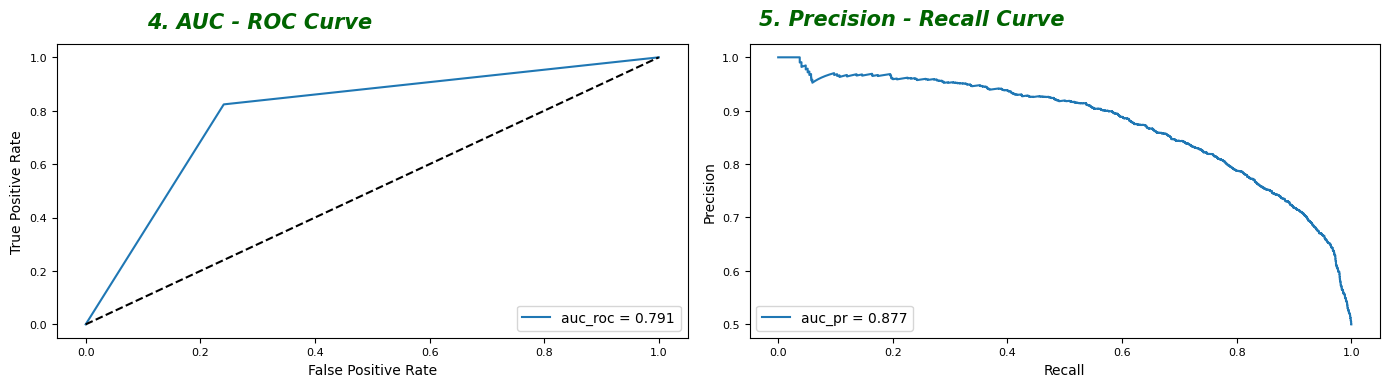

[[0.797762944254014,
  0.5840757959761187,
  0.7733473242392445,
  0.8237704918032787,
  0.7914030517305545,
  0.7914391492473642,
  0.8770497527845357]]

In [394]:
Generate_Model_Test_Classification_Report(pModel, x_test_lasso, y_test_lasso, 'Perceptron (Lasso)')

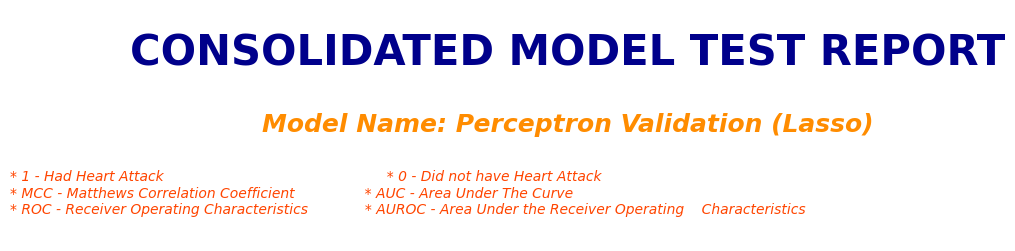

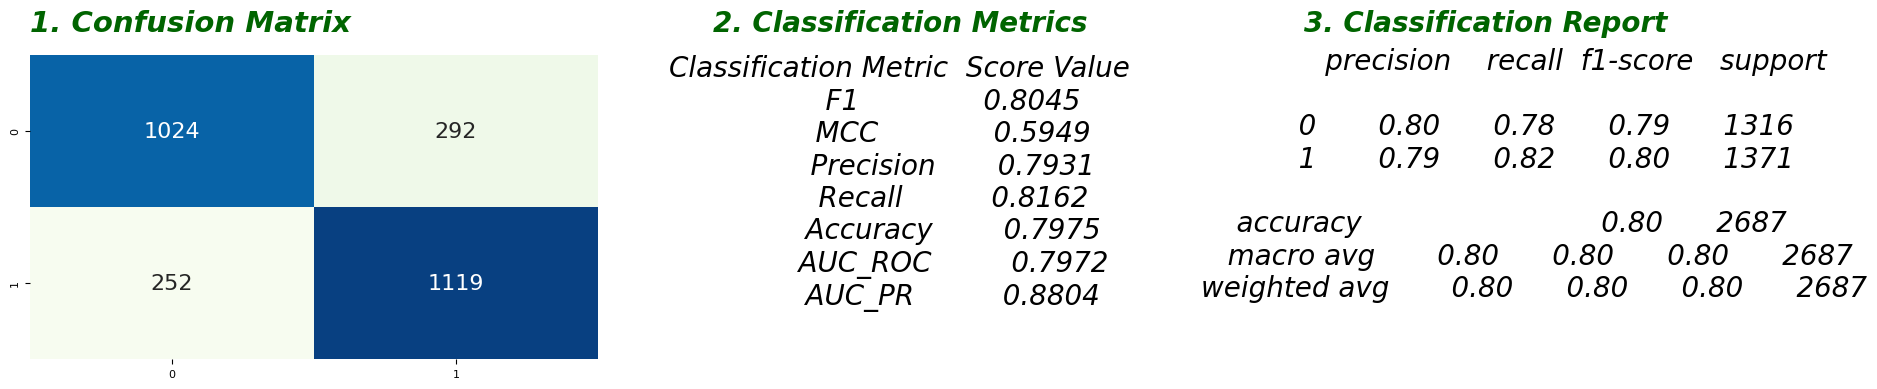

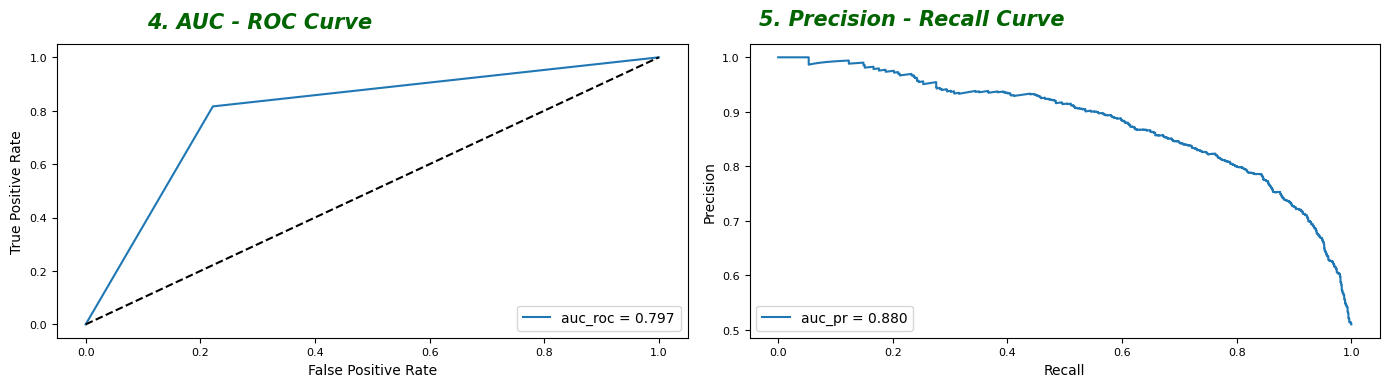

[[0.8044572250179726,
  0.5949349043765604,
  0.7930545712260808,
  0.8161925601750547,
  0.7975437290658727,
  0.7971540308474059,
  0.8803854155266452]]

In [395]:
Generate_Model_Test_Classification_Report(pModel, x_val_lasso, y_val_lasso, 'Perceptron Validation (Lasso)')

In [396]:

sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_lasso, y_train_lasso)
sgdResults=sgdModel.predict(x_test_lasso)

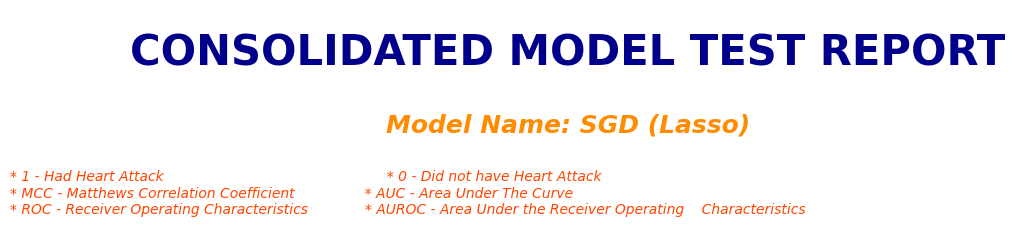

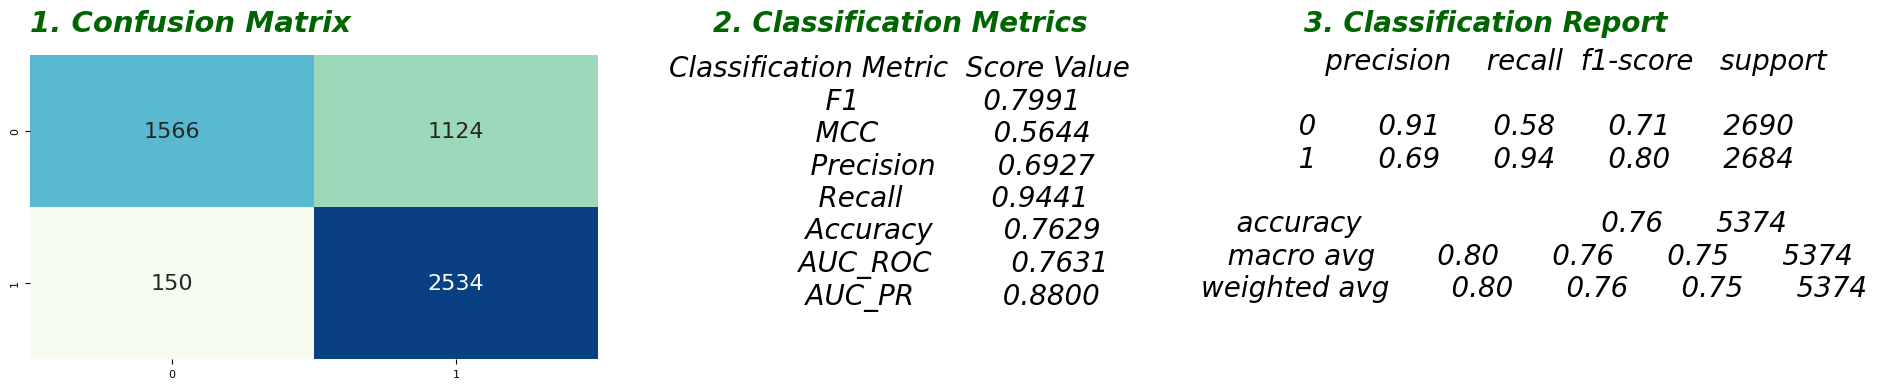

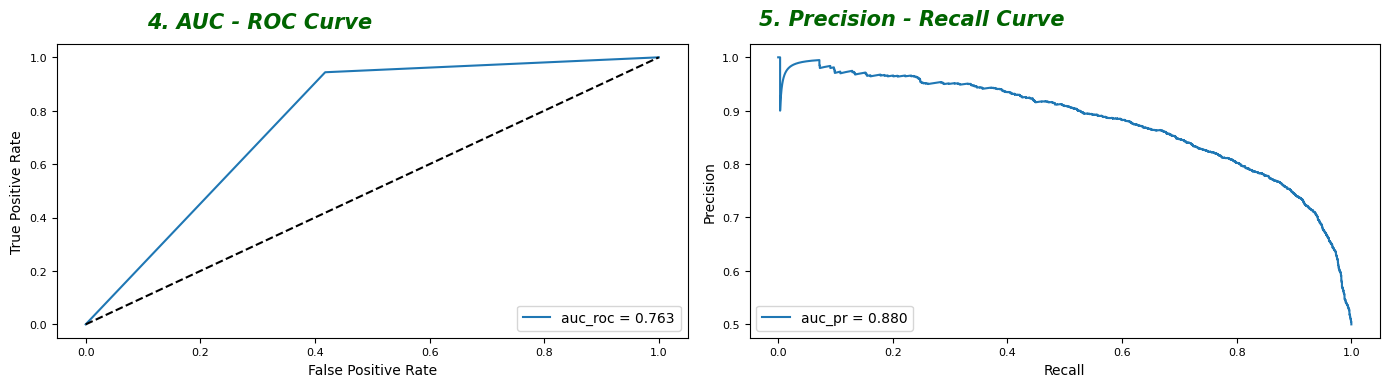

[[0.7991169977924945,
  0.5644104162436409,
  0.6927282668124658,
  0.944113263785395,
  0.7629326386304429,
  0.7631346988071955,
  0.8800026279356081]]

In [397]:
Generate_Model_Test_Classification_Report(sgdModel, x_test_lasso, y_test_lasso, 'SGD (Lasso)')

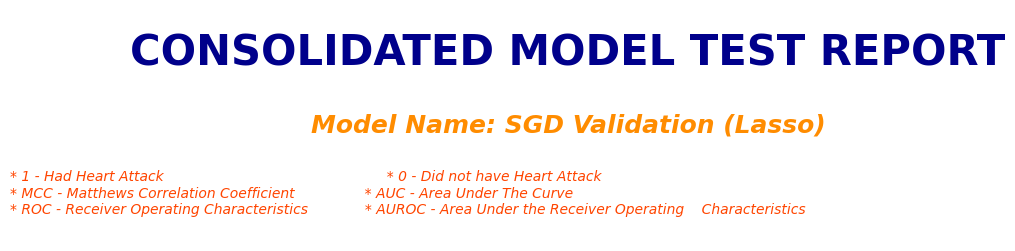

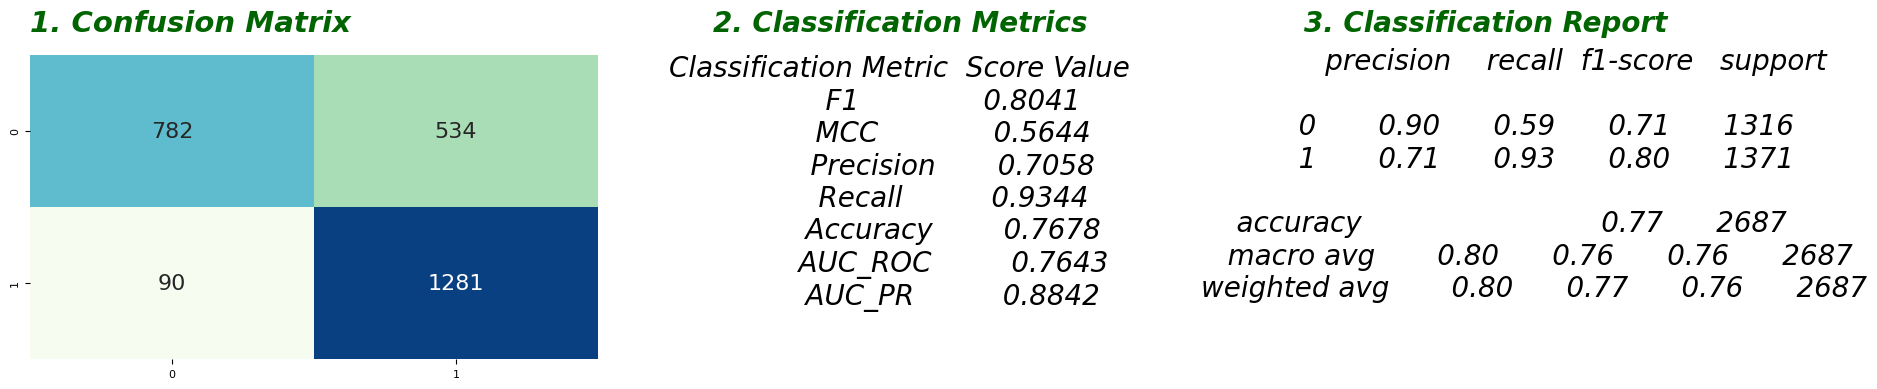

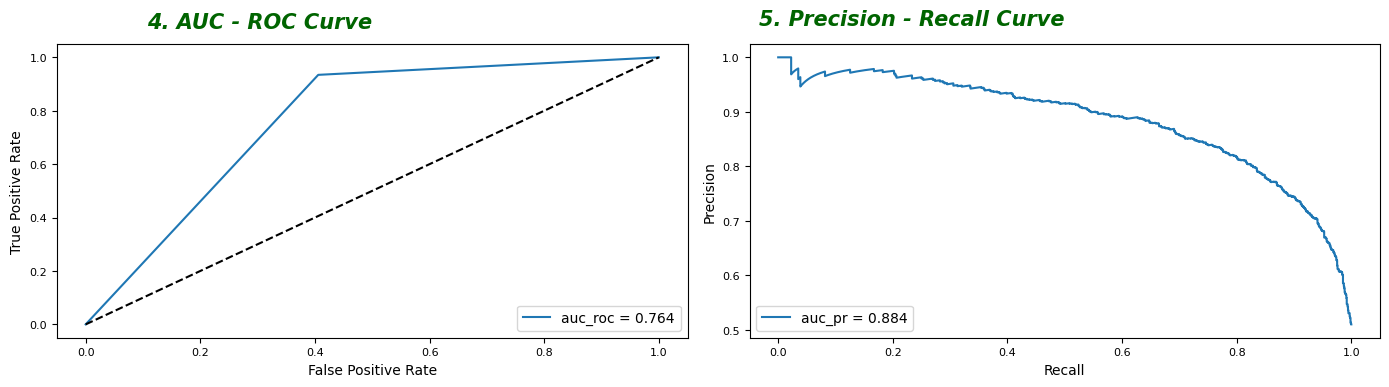

[[0.8041431261770244,
  0.5643653691990637,
  0.7057851239669422,
  0.9343544857768052,
  0.7677707480461481,
  0.7642897048944817,
  0.8841561466132404]]

In [398]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_lasso, y_val_lasso, 'SGD Validation (Lasso)')

In [399]:
lrModel=LogisticRegression(max_iter=300000)
lrModel=lrModel.fit(x_train_lasso, y_train_lasso)
lrResults=lrModel.predict(x_test_lasso)

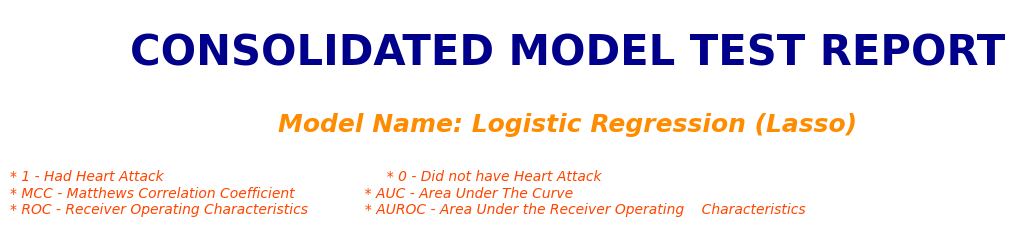

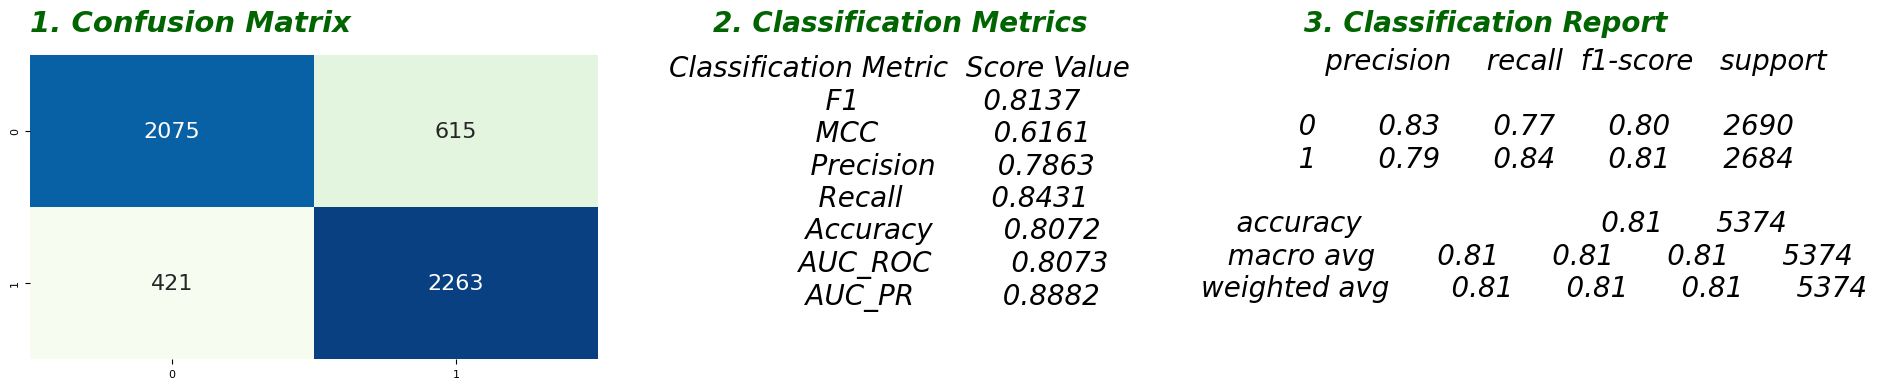

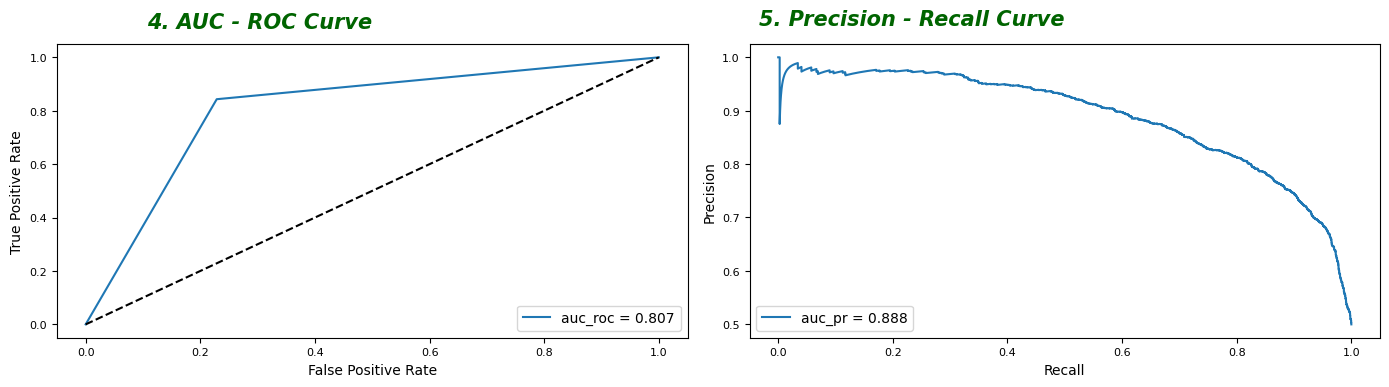

[[0.8137360661632506,
  0.6160780702290709,
  0.7863099374565671,
  0.8431445603576752,
  0.8072199478972832,
  0.807260012520845,
  0.8882281211192469]]

In [400]:
Generate_Model_Test_Classification_Report(lrModel, x_test_lasso, y_test_lasso, 'Logistic Regression (Lasso)')

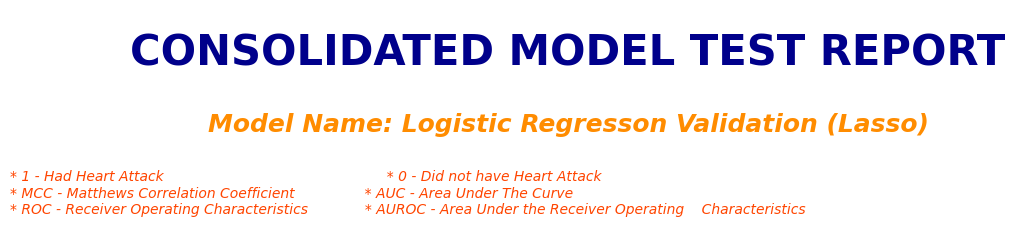

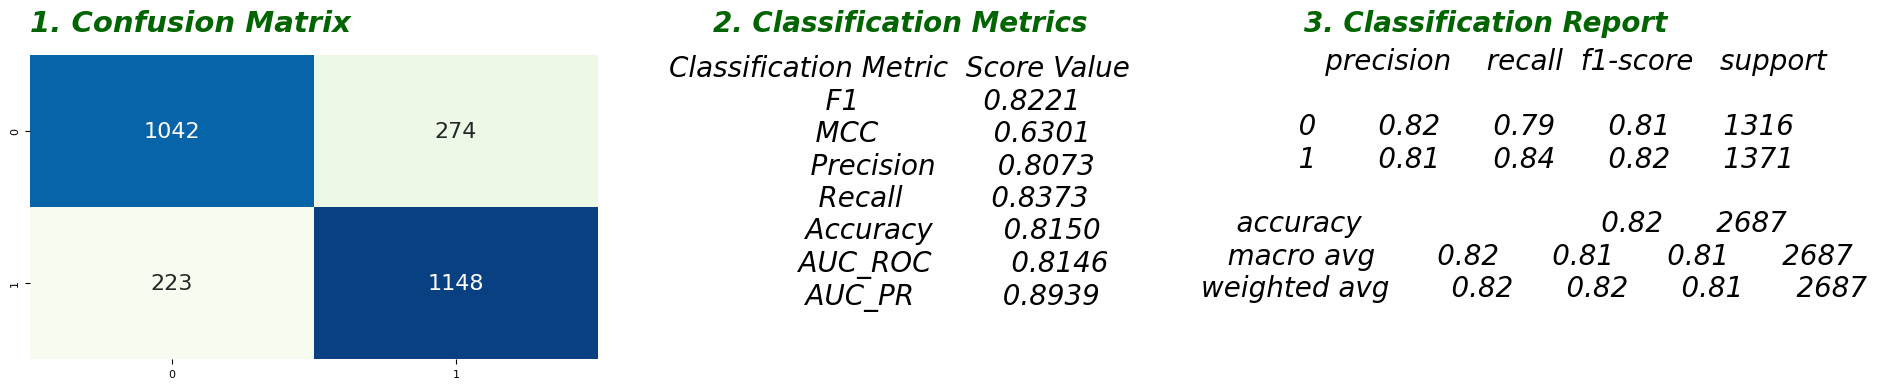

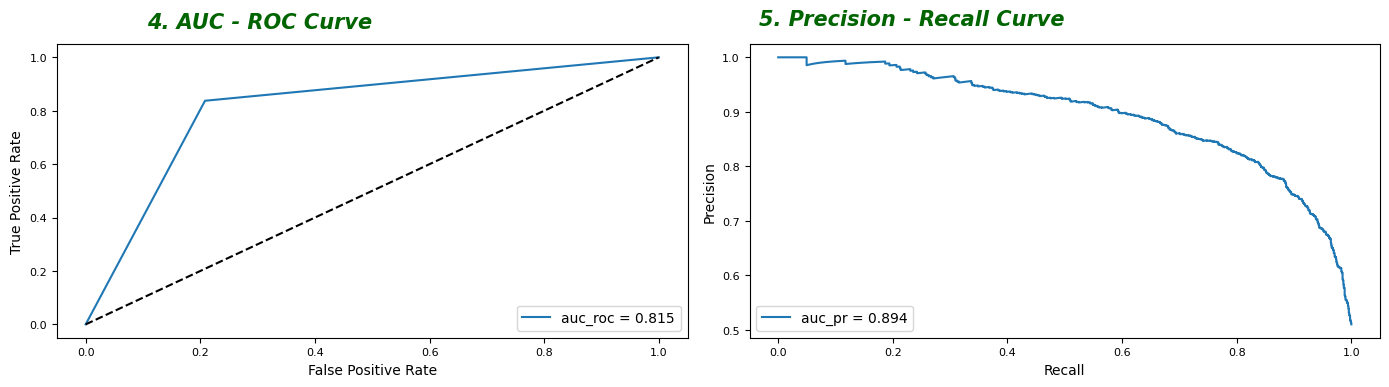

[[0.8220551378446115,
  0.6300829780345695,
  0.8073136427566807,
  0.8373450036469731,
  0.815035355414961,
  0.8145691583584409,
  0.8939025044586726]]

In [401]:
Generate_Model_Test_Classification_Report(lrModel, x_val_lasso, y_val_lasso, 'Logistic Regresson Validation (Lasso)')

In [402]:
from sklearn.svm import LinearSVC

svmModel=CalibratedClassifierCV(LinearSVC(max_iter=50000))
svmModel=svmModel.fit(x_train_lasso, y_train_lasso)
svmResults=svmModel.predict(x_test_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


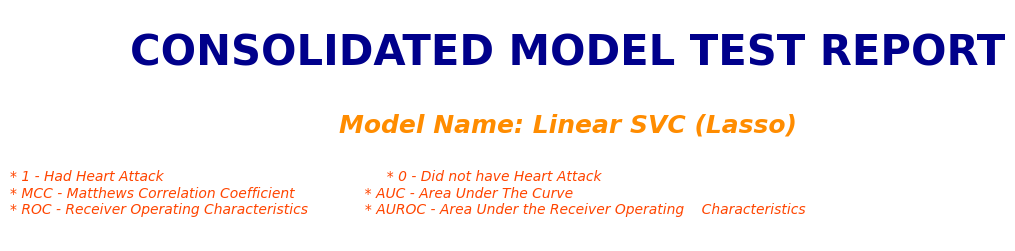

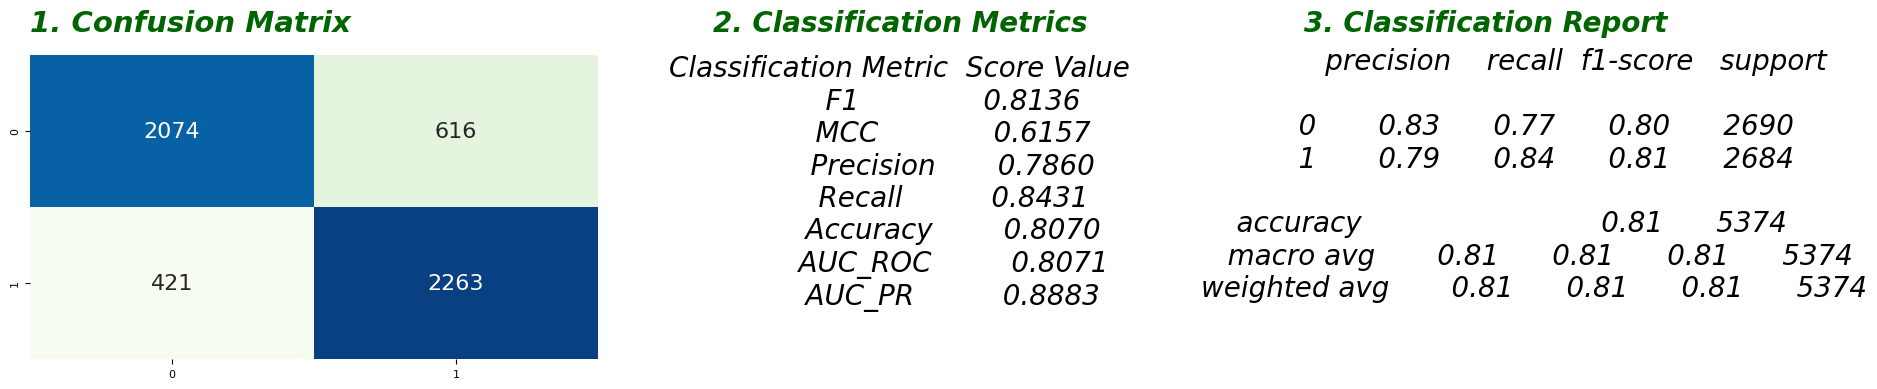

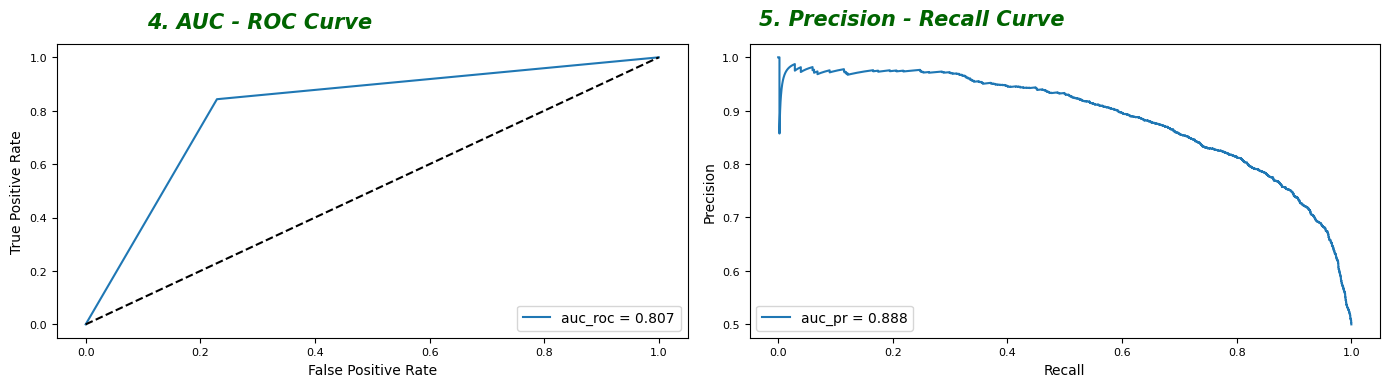

[[0.8135897896818264,
  0.6157217948459428,
  0.7860368183397013,
  0.8431445603576752,
  0.8070338667659099,
  0.807074138914897,
  0.8883277245415757]]

In [403]:
Generate_Model_Test_Classification_Report(svmModel, X_test=x_test_lasso, y_test=y_test_lasso, model_name='Linear SVC (Lasso)')

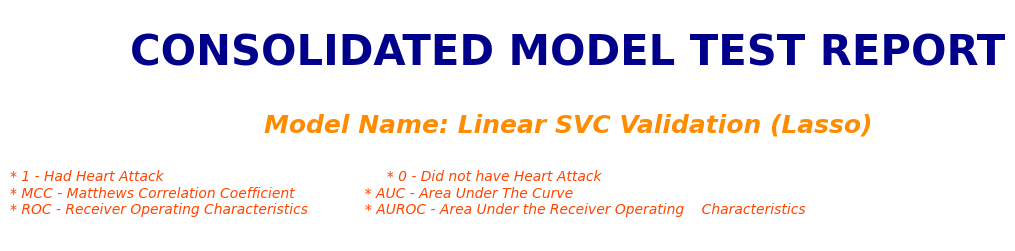

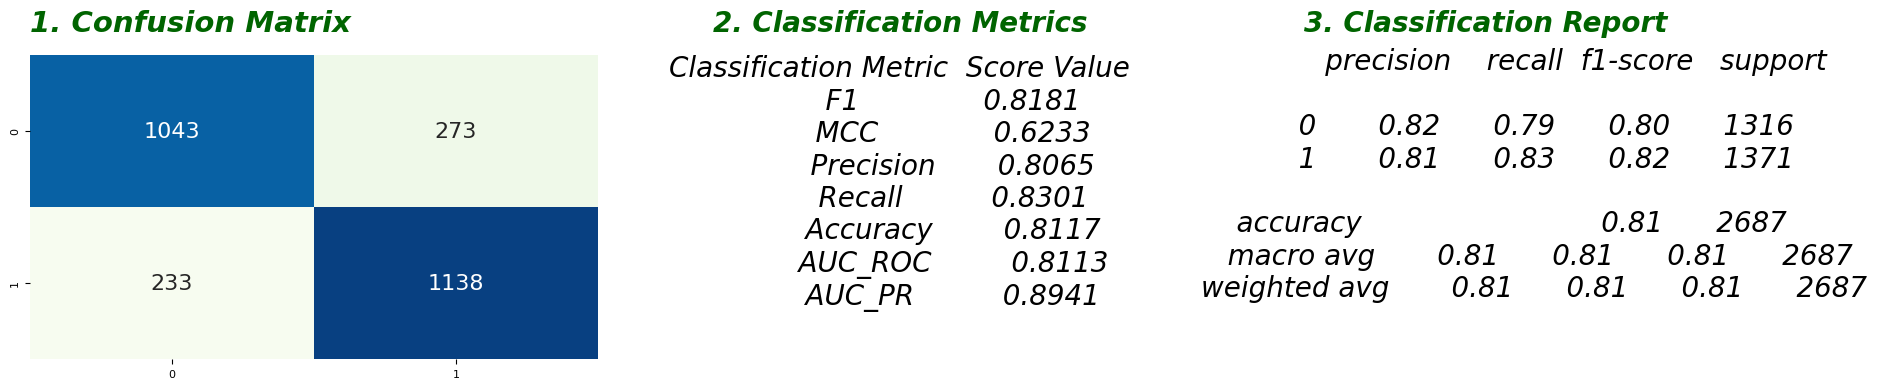

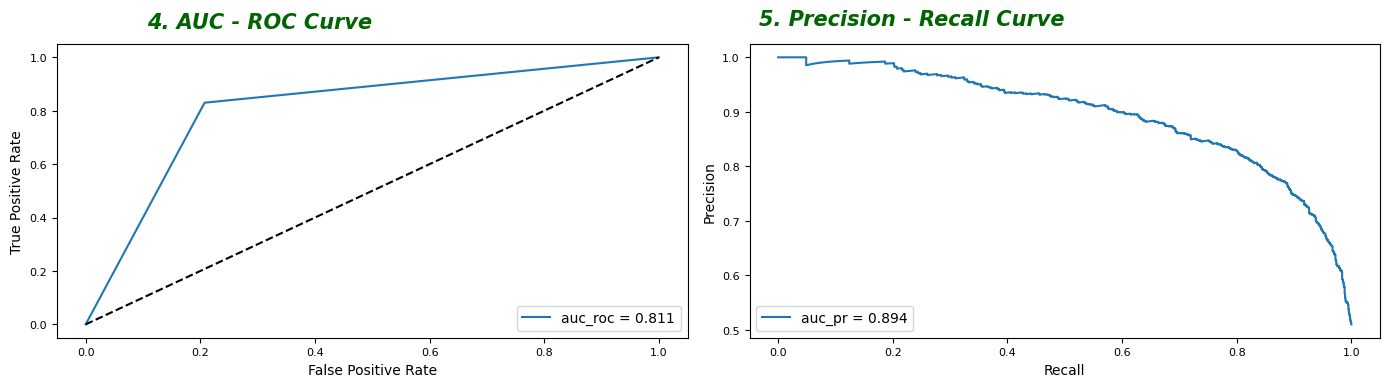

[[0.818116462976276,
  0.623260937018592,
  0.8065201984408221,
  0.8300510576221736,
  0.8116858950502419,
  0.8113021245557677,
  0.8941480392317238]]

In [404]:
Generate_Model_Test_Classification_Report(svmModel, x_val_lasso, y_val_lasso, 'Linear SVC Validation (Lasso)')